In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20, 12)

Unfortunately, the column for the risk factor "High total cholesterol" is filled in very poorly (it was only measured in 1990, 1995, 2000, 2005, 2006, 2010, 2016). The remaining values will be filled in using linear interpolation. There is also one missing value in the "Outdoor air pollution" column, which was also filled in using linear interpolation.


In [35]:
df = pd.read_csv('number-of-deaths-by-risk-factor.csv')
df

,Entity,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
0,Afghanistan,1990,7554.049543,5887.747628,5412.314513,22388.497230,3221.138842,156.097553,22778.849250,10408.438850,...,28183.98335,6393.667372,726.431294,9344.131952,374.844056,26598.006730,4383.83,2737.197934,11381.377350,7299.867330
1,Afghanistan,1991,7359.676749,5732.770160,5287.891103,22128.758210,3150.559597,151.539851,22292.691110,10271.976430,...,28435.39751,6429.253320,739.245799,9330.182378,379.854237,26379.532220,4426.36,2741.184956,11487.832390,7386.764303
2,Afghanistan,1992,7650.437822,5954.804987,5506.657363,22873.768790,3331.349048,156.609194,23102.197940,10618.879780,...,29173.61120,6561.054957,873.485341,9769.844533,388.130434,27263.127910,4568.91,2798.560245,11866.235570,7640.628526
3,Afghanistan,1993,10270.731380,7986.736613,7104.620351,25599.756280,4477.006100,206.834451,27902.669960,12260.093840,...,30074.76091,6731.972560,1040.047422,11433.769490,405.577931,30495.561500,5080.29,2853.301679,12335.961680,7968.311853
4,Afghanistan,1994,11409.177110,8863.010065,8051.515953,28013.167200,5102.622054,233.930571,32929.005930,14197.947960,...,30809.49117,6889.328118,1101.764645,12936.955860,415.349195,33323.161400,5499.23,2880.025765,12672.950190,8244.368430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,2013,4254.282075,2977.649750,3913.210510,7613.561005,1037.968042,59.150493,7703.062474,1317.296056,...,11077.32708,9099.552194,382.544583,1130.714398,238.297856,9593.033931,2053.58,1018.389001,2687.636261,2409.930182
6464,Zimbabwe,2014,4098.769691,2856.426187,3809.245683,7429.446352,972.886327,54.334796,7401.059382,1259.989023,...,11015.12167,8902.223776,353.386096,1094.267123,237.534426,9387.193480,2030.92,1016.407438,2654.381923,2399.261581
6465,Zimbabwe,2015,3921.291358,2717.735794,3688.442102,7267.029297,912.248164,50.255551,7100.476546,1205.589945,...,11005.40982,8818.570004,332.355373,1068.810953,240.663191,9189.336702,1994.91,1019.971539,2635.950107,2398.525219
6466,Zimbabwe,2016,3802.257512,2624.315858,3603.179799,7134.595677,875.706009,47.719473,6823.766727,1099.871279,...,11096.18244,8758.486720,319.692576,950.215259,244.719399,9092.577378,2030.88,1032.181216,2641.376815,2417.422521


In [36]:
df['High total cholesterol'] = df['High total cholesterol'].interpolate(
    method='linear')
df['Outdoor air pollution'] = df['Outdoor air pollution'].interpolate(
    method='linear')
# We verify that all missing values have been filled.
print(df.isnull().any().isnull().any())

False


In [37]:
def get_sorted_info_with_country_and_year(df, country, year):
    # Extract column labels from DataFrame
    labels = df.columns
    labels = labels[2:31]
    # Filter DataFrame for specified country and year, extract values
    values = df.loc[(df['Entity'] == country) & (
        df['Year'] == year)].to_numpy()[0][2:31]
    # Sort labels and values based on values
    zipped_values = sorted(list(zip(labels, values)), key=lambda x: x[1])
    # Separate sorted labels and values
    labels, values = zip(*zipped_values)

    return labels, values

In [38]:
def get_info_with_country_and_year(df, country, year):
    # Filter DataFrame for specified country and year, extract values from the third to the thirty-first column
    values = df.loc[(df['Entity'] == country) & (
        df['Year'] == year)].to_numpy()[0][2:31]
    return values

In [39]:
# This function plots a bar chart showing the number of deaths by risk factors for a specified country and year, with labels rotated for better readability.
def plot_with_risk_factors(df, country, year):
    labels, y = get_sorted_info_with_country_and_year(df, country, year)

    plt.bar(labels, y)
    plt.xlabel('Risk factors')
    plt.ylabel('Number of Death')
    plt.title(f'Number of Deaths by Risk Factors in {country} ({year})')
    plt.xticks(rotation=90)
    plt.show()

In [40]:
def calculate_sorted_difference(df, firstCountry, firstYear, secondCountry, secondYear):
    labels = df.columns[2:31]
    firstList = get_info_with_country_and_year(df, firstCountry, firstYear)
    secondList = get_info_with_country_and_year(df, secondCountry, secondYear)

    # Calculate the difference between the two lists of values
    diff = firstList - secondList
    # Zip the labels and differences together, sort them by the difference values
    zipped_values = sorted(list(zip(labels, diff)), key=lambda x: x[1])
    # Unzip the sorted values back into separate labels and differences lists
    labels, diff = zip(*zipped_values)

    return (labels, diff)

In [41]:
# Plots difference graph
def plot_difference(df, firstCountry, firstYear, secondCountry, secondYear):
    labels_diff, y_diff = calculate_sorted_difference(
        df, firstCountry, firstYear, secondCountry, secondYear)
    plt.bar(labels_diff, y_diff)
    plt.xlabel('Risk factors')
    plt.ylabel('Change in number of death')
    plt.title(f'Change in number of death {firstCountry} ({
              firstYear}) - {secondCountry} ({secondYear})')
    plt.xticks(rotation=90)
    plt.show()

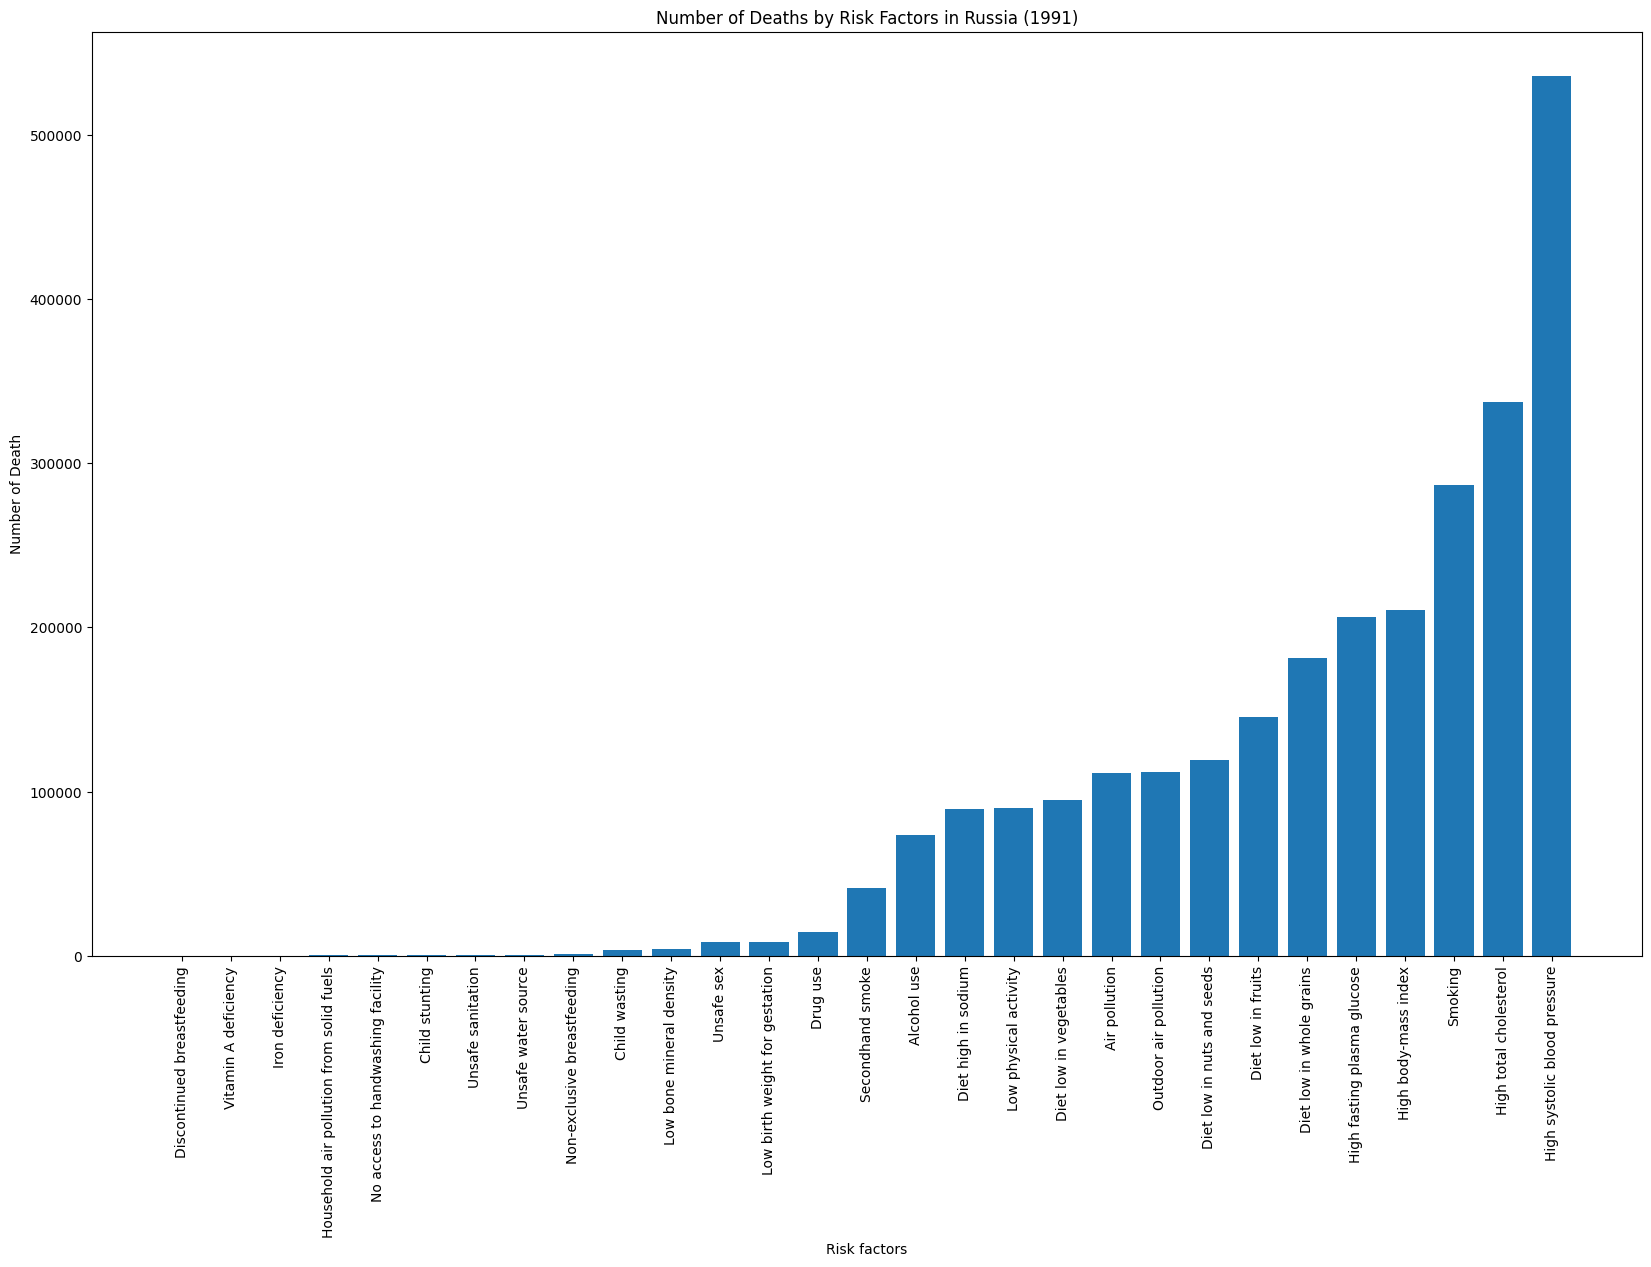

In [42]:
plot_with_risk_factors(df, 'Russia', 1991)

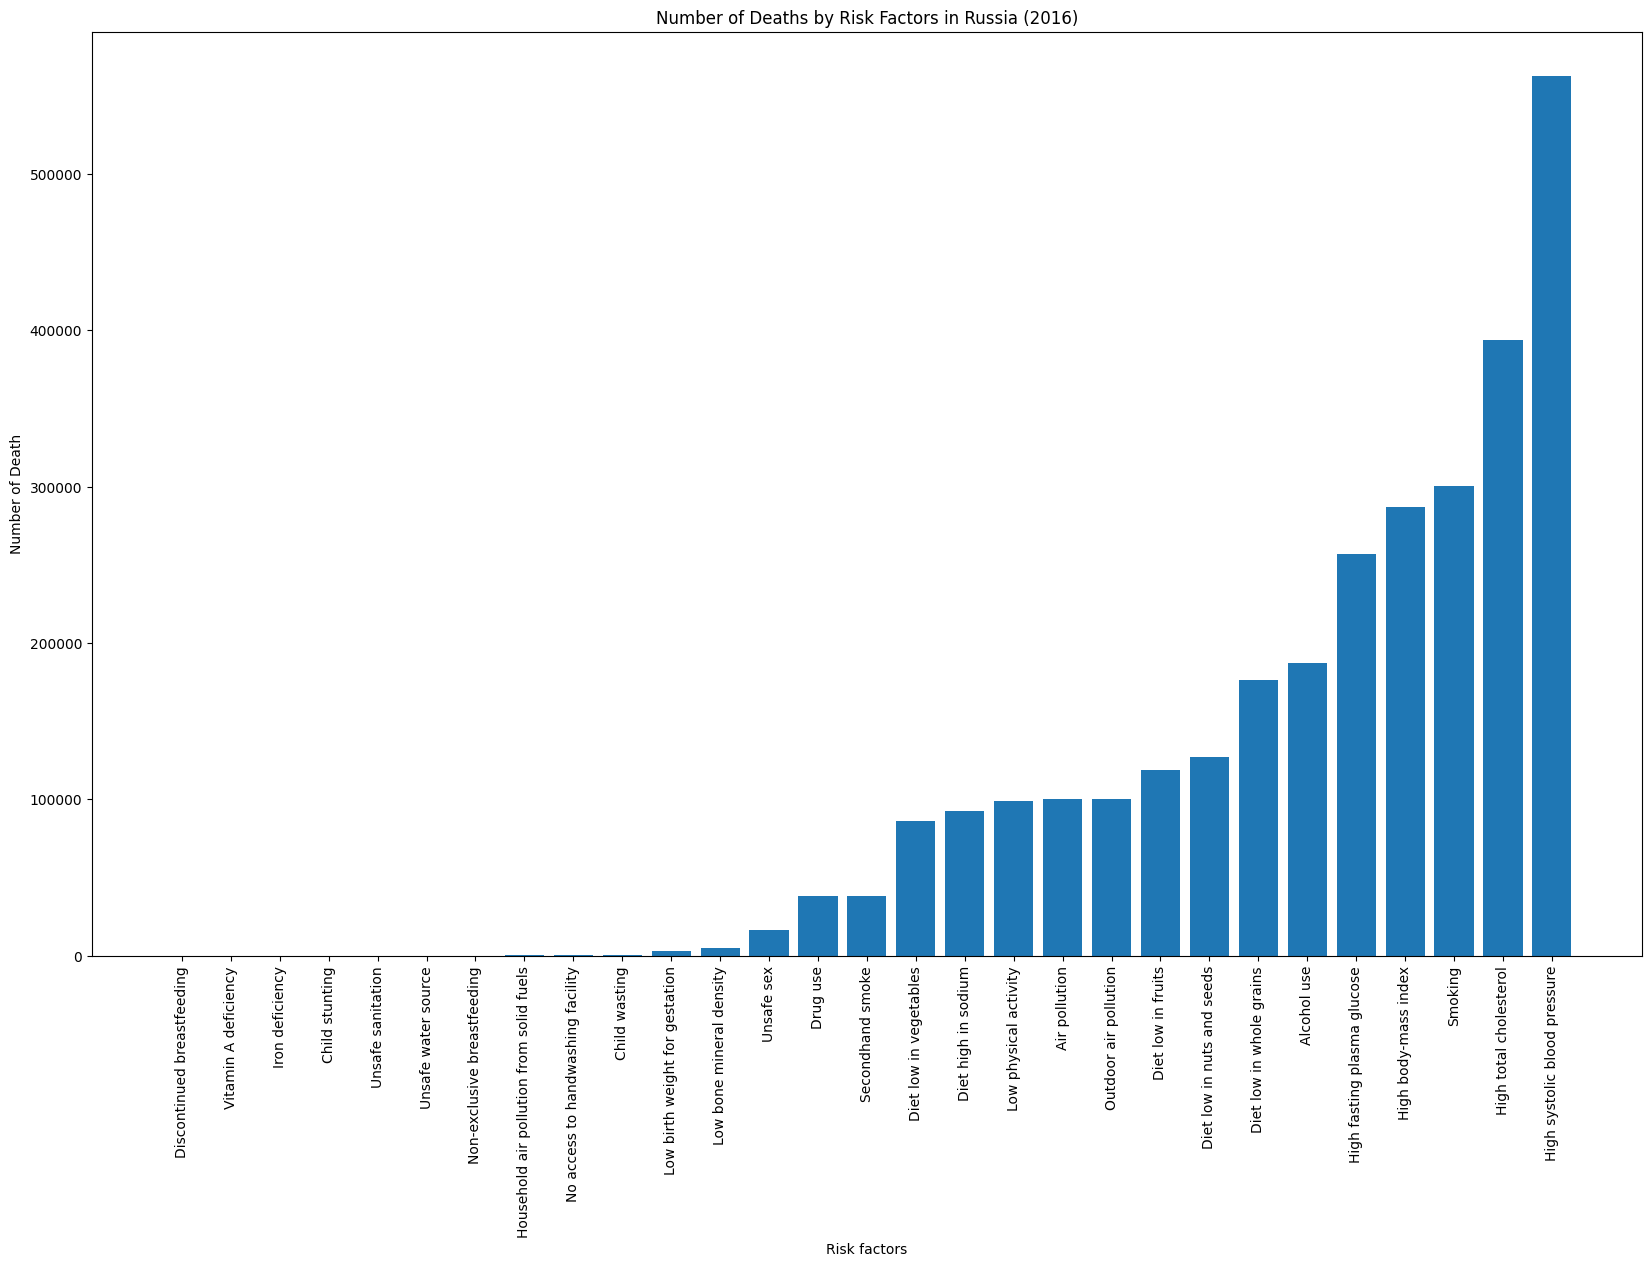

In [43]:
plot_with_risk_factors(df, 'Russia', 2016)

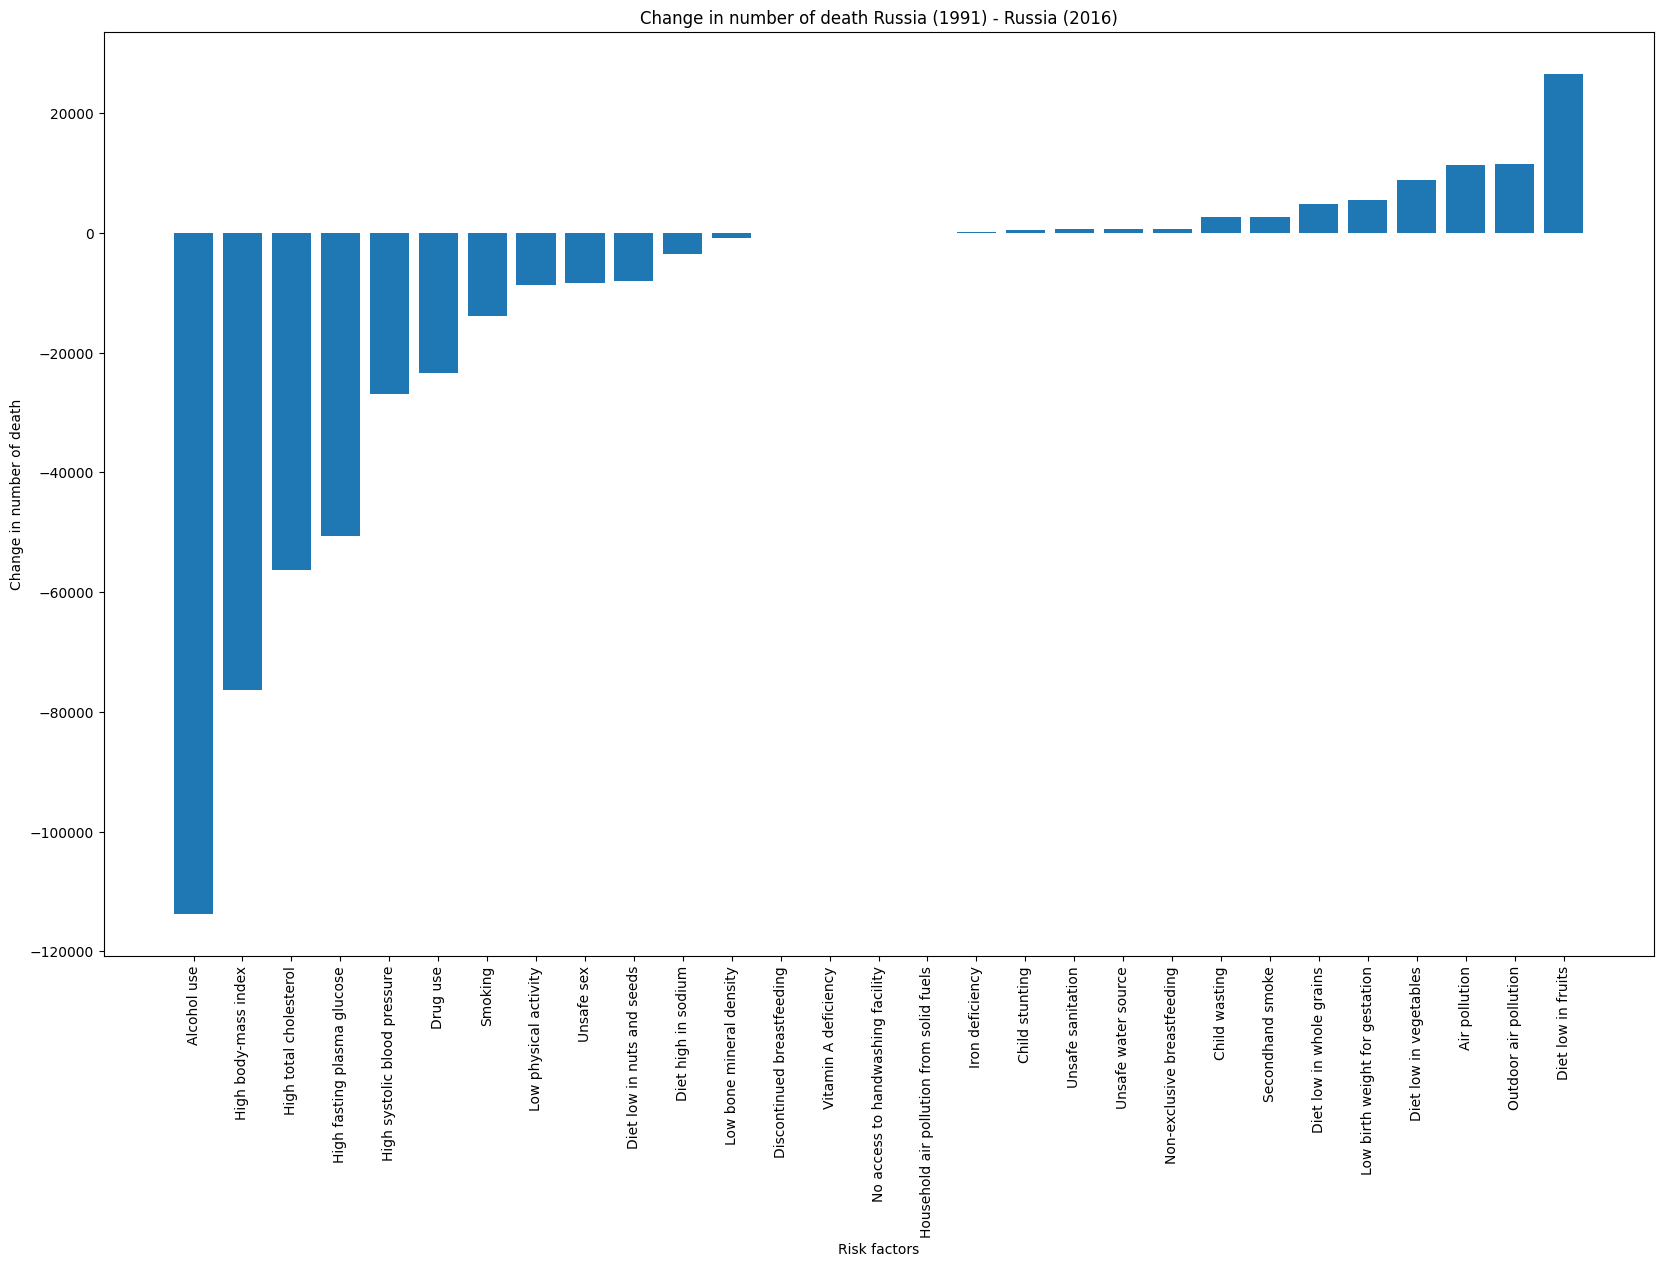

In [44]:
plot_difference(df, 'Russia', 1991, 'Russia', 2016)

In [45]:
# Loads csv, which transformes different names of countries to their uniwue code
population = pd.read_csv(
    'https://raw.githubusercontent.com/datasets/population/main/data/population.csv')

population = population.rename(columns={'Country Name': 'Entity'})

population = population.drop(columns=['Entity'])

In [46]:
import pandas as pd
from functools import lru_cache


class CountryConverter:
    # Static DataFrame to store country name mappings
    country_code = pd.read_csv('country_iso_codes_expanded.csv')

    @staticmethod
    @lru_cache(maxsize=None)  # Caching
    def name_to_code(country_name):
        # Iterate through each row and column in the DataFrame
        for i in range(CountryConverter.country_code.shape[0]):
            for j in range(CountryConverter.country_code.shape[1]):
                # If the current cell is NaN, break the inner loop
                if pd.isna(CountryConverter.country_code.iloc[i, j]):
                    break
                # If the current cell matches the country name, return the corresponding country code
                if CountryConverter.country_code.iloc[i, j] == country_name:
                    return CountryConverter.country_code.iloc[i, 2]
        # If no match is found, return the original country name
        return country_name

In [47]:
# Converting process
countryConverter = CountryConverter()

df['Country Code'] = df['Entity'].apply(countryConverter.name_to_code)

df_not_normalized = pd.merge(df, population, on=['Country Code', 'Year'])

df_not_normalized = df_not_normalized.rename(columns={'Value': 'Population'})

In [48]:
# Adds information about gdp and ppp to the table
gdp = pd.read_csv('gdp.csv')

gdp = gdp.rename(columns={'Value': 'gdp'})

gdp = gdp.drop(columns=['Country Name'])

df_not_normalized = pd.merge(df_not_normalized, gdp, on=[
                             'Country Code', 'Year'])

df_not_normalized['ppp'] = df_not_normalized['gdp'] / \
    df_not_normalized['Population']

In [49]:
# df_normalized_per_person stores information about how much death happen per one person for a specific reason
df_normalized_per_person = df_not_normalized.iloc[:, 2:31].div(
    df_not_normalized['Population'], axis=0)

df_normalized_per_person = pd.concat([df_not_normalized[['Entity', 'Year']], df_normalized_per_person, df_not_normalized[[
                                     'Country Code', 'Population', 'gdp', 'ppp']]], axis=1)

In [50]:
norms = np.linalg.norm(df_not_normalized.iloc[:, 2:31], axis=1)

df_normalized_per_death = df_not_normalized.iloc[:, 2:31].div(norms, axis=0)
df_normalized_per_death = pd.concat([df_not_normalized[['Entity', 'Year']], df_normalized_per_death, df_not_normalized[[
                                    'Country Code', 'Population', 'gdp', 'ppp']]], axis=1)

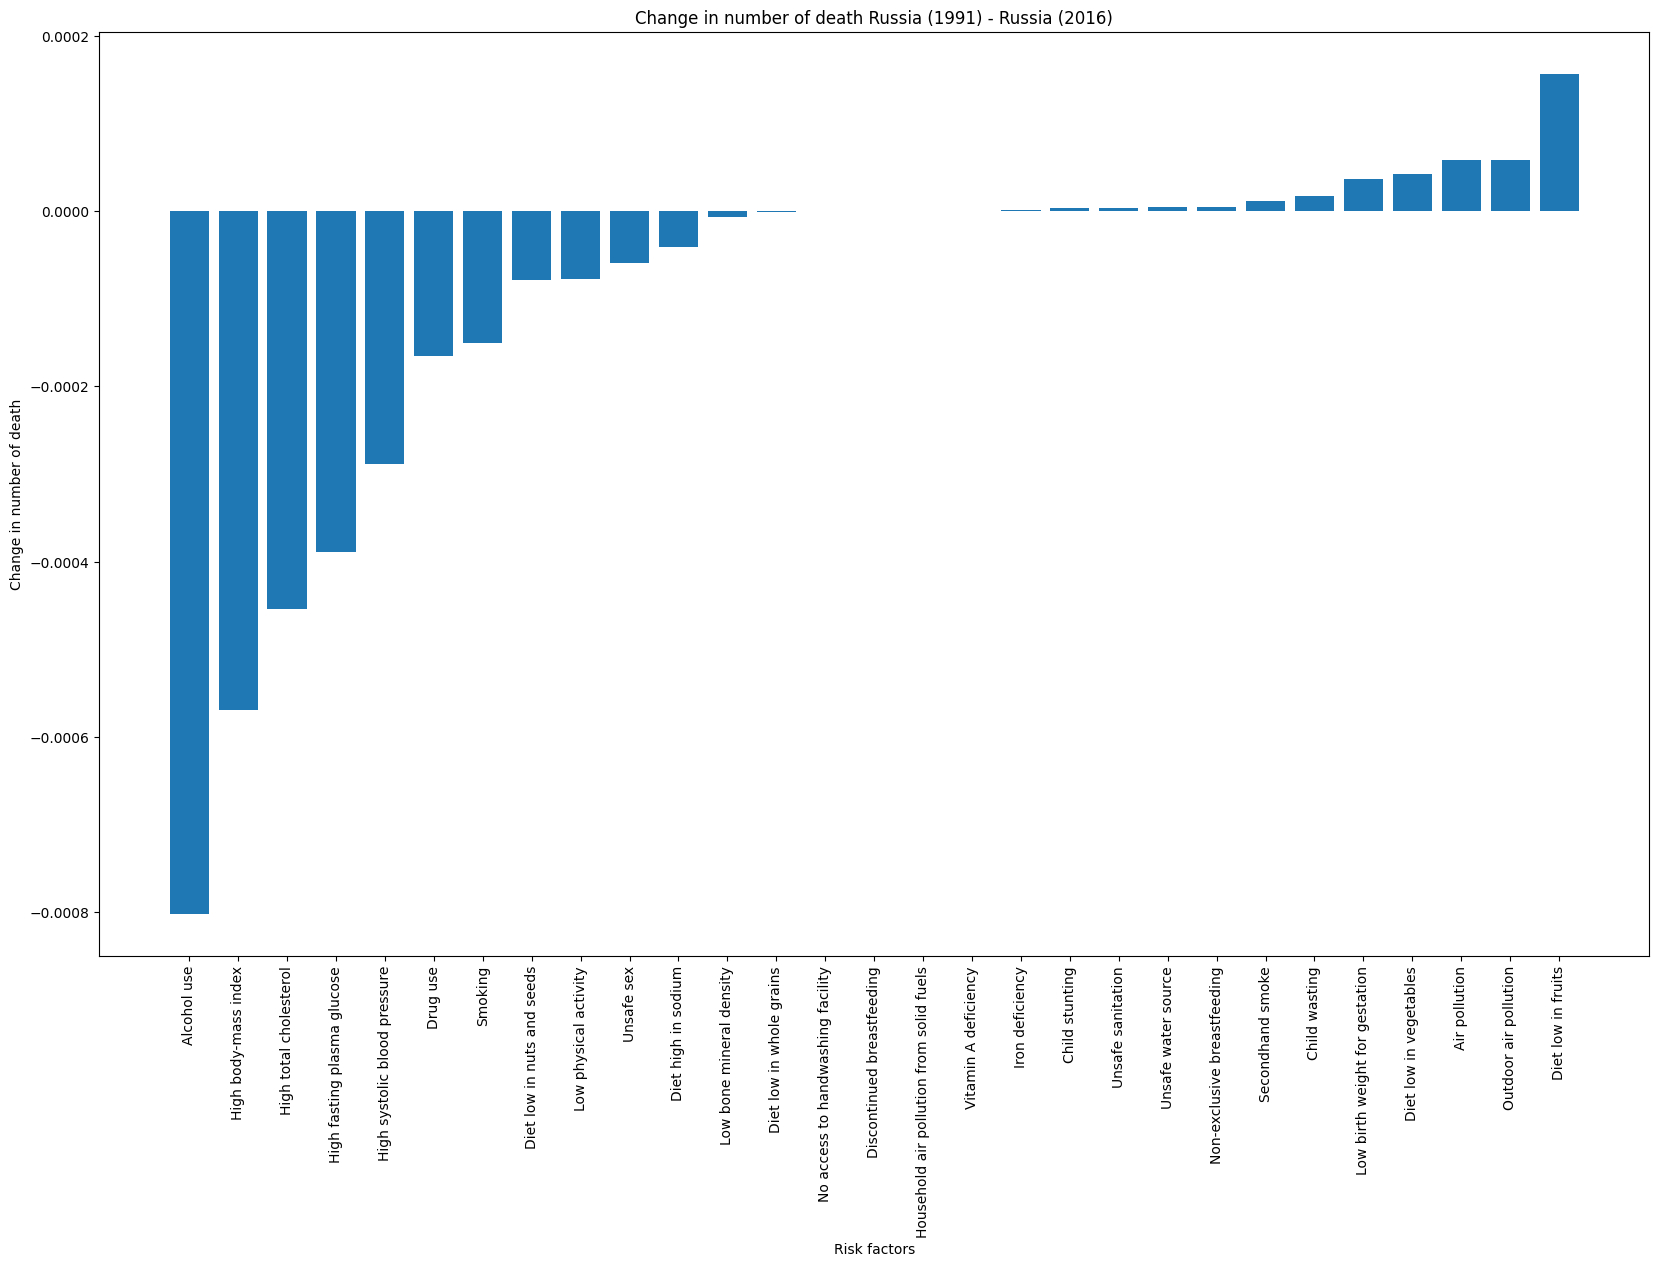

In [51]:
plot_difference(df_normalized_per_person, 'Russia', 1991, 'Russia', 2016)

In [52]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import TSNE


def metric(firstRow, secondRow):
    return np.linalg.norm(firstRow - secondRow)


def clusterize(data, year, NC=4):
    data_for_year = data[data['Year'] == year]
    countries = data_for_year['Country Code']
    data_for_year = data_for_year.iloc[:, 2:31]

    pca = TSNE(n_components=3)
    data_for_year = pca.fit_transform(data_for_year)

    # Calculation of custom distance between vectors
    distance_matrix = pdist(data_for_year, metric=metric)
    distance_matrix = squareform(distance_matrix)

    clustering = KMeans(n_clusters=NC, random_state=42)
    result = clustering.fit_predict(distance_matrix)

    zipped = list(zip(countries, result))
    return zipped


def clusterize_visualize(data, year, max_NC):
    data_for_year = data[data['Year'] == year]
    countries = data_for_year['Country Code']
    data_for_year = data_for_year.iloc[:, 2:31]

    pca = TSNE(n_components=2)
    data_for_year = pca.fit_transform(data_for_year)

    # Calculation of custom distance between vectors
    distance_matrix = pdist(data_for_year, metric=metric)
    distance_matrix = squareform(distance_matrix)
    for n in range(2, max_NC + 1):
        clustering = KMeans(n_clusters=n, random_state=0,
                            init='k-means++', max_iter=1000)
        result = clustering.fit_predict(distance_matrix)
        plt.scatter(data_for_year[:, 0],
                    data_for_year[:, 1], c=result, cmap='Set1')
        plt.title(f"Clusterization with {n} classes")
        plt.show()
    zipped = list(zip(countries, result))
    return zipped

In [53]:
def draw_map(data, year, NC, world, vis_dots=False):
    # Clustering data for the current year
    countries_clusters = None
    if (vis_dots):
        countries_clusters = clusterize_visualize(data, year, NC)
        return
    else:
        countries_clusters = clusterize(data, year, NC)

    # Convert the list of tuples into a DataFrame
    countries_clusters = pd.DataFrame(countries_clusters, columns=[
                                      'Country Code', 'Cluster'])

    # Match data
    world = world.set_index('iso_a3').join(
        countries_clusters.set_index('Country Code'))
    world['Cluster'] = world['Cluster'].fillna(-1)

    # Visualization
    world.plot(column='Cluster', legend=True, categorical=True,
               linewidth=0.8, edgecolor='0.8', cmap='Set1')
    plt.title(f'Clusters of countries in {year} year')
    plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_13500\3165041326.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


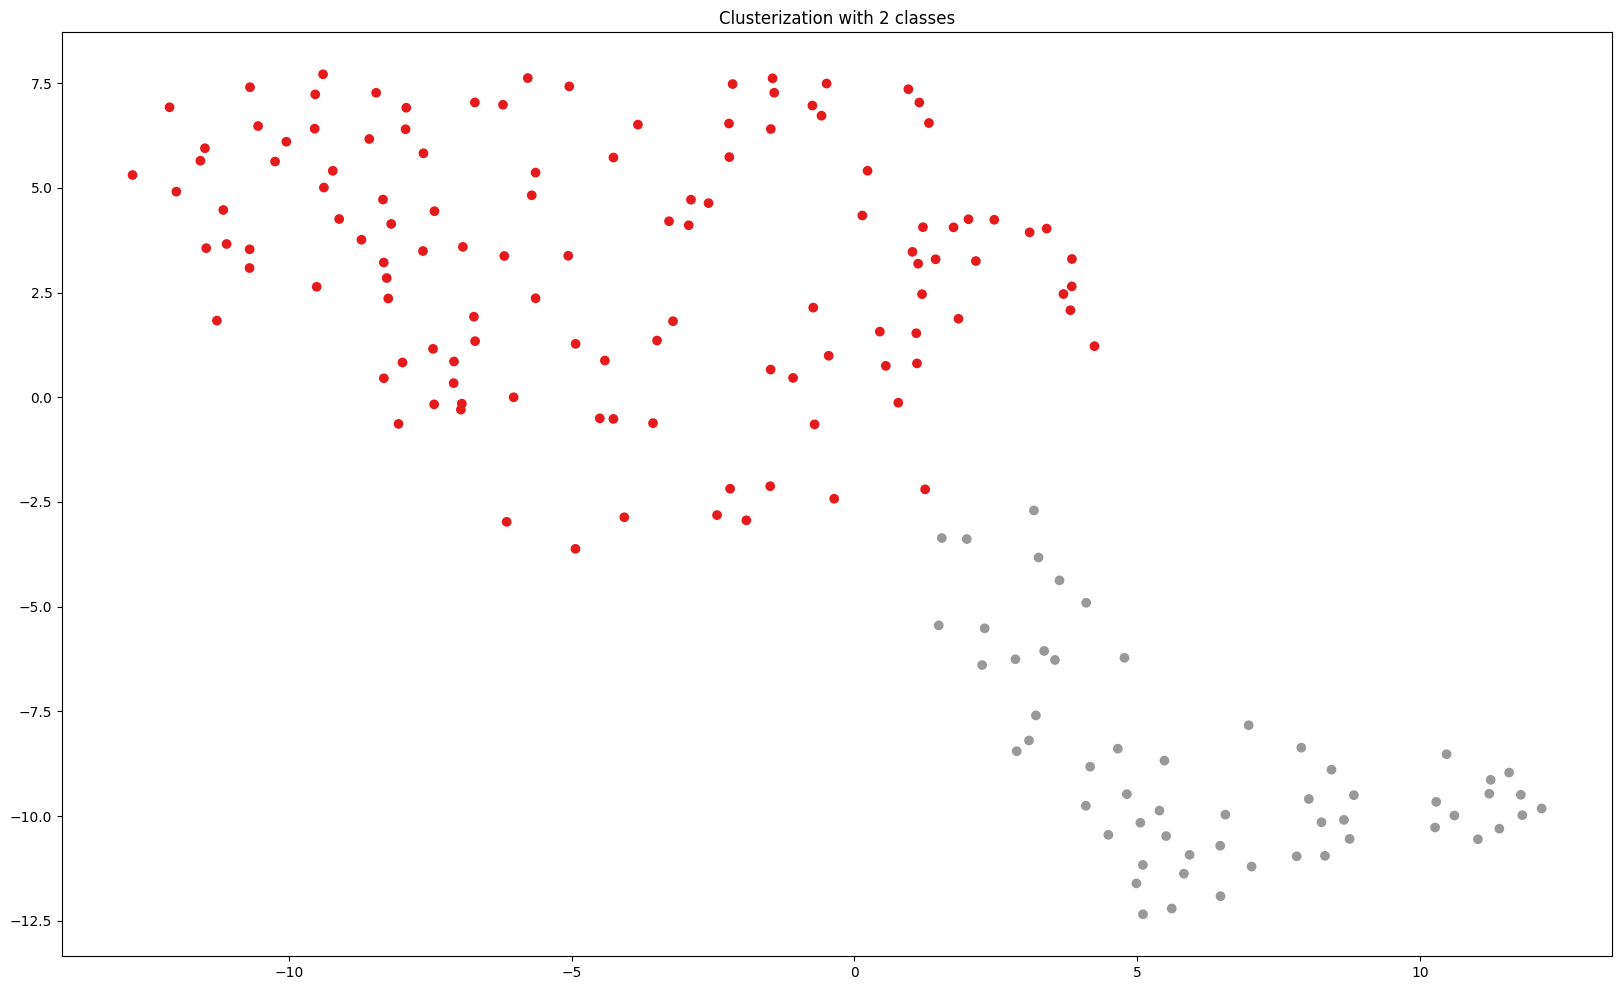

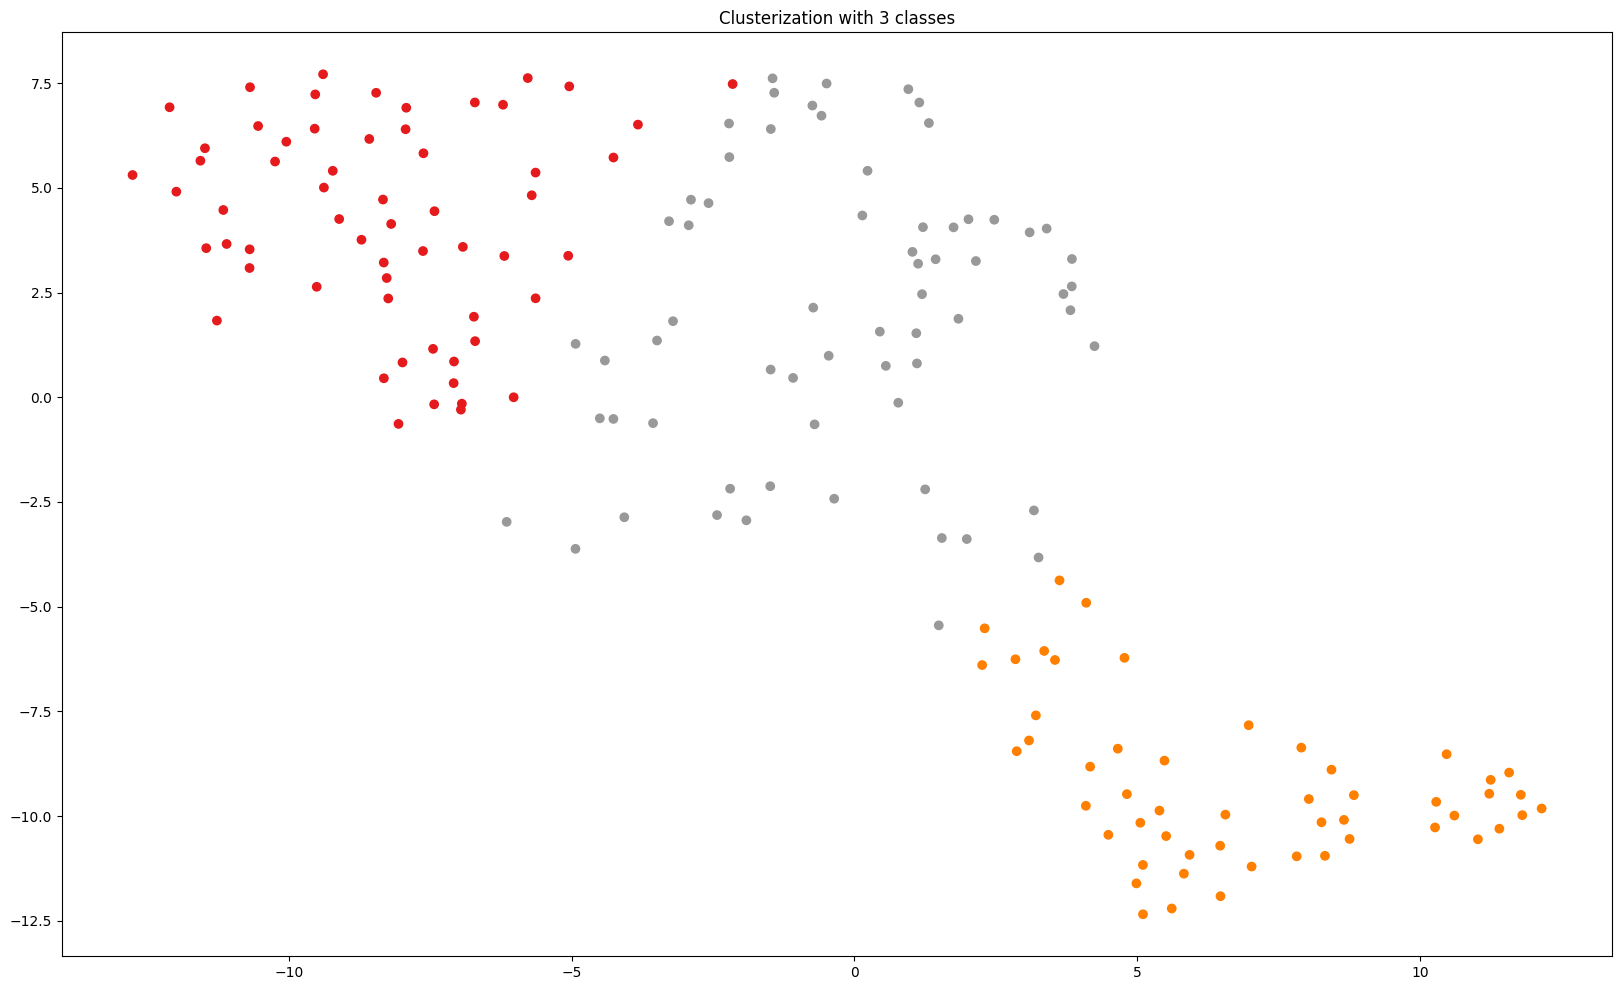

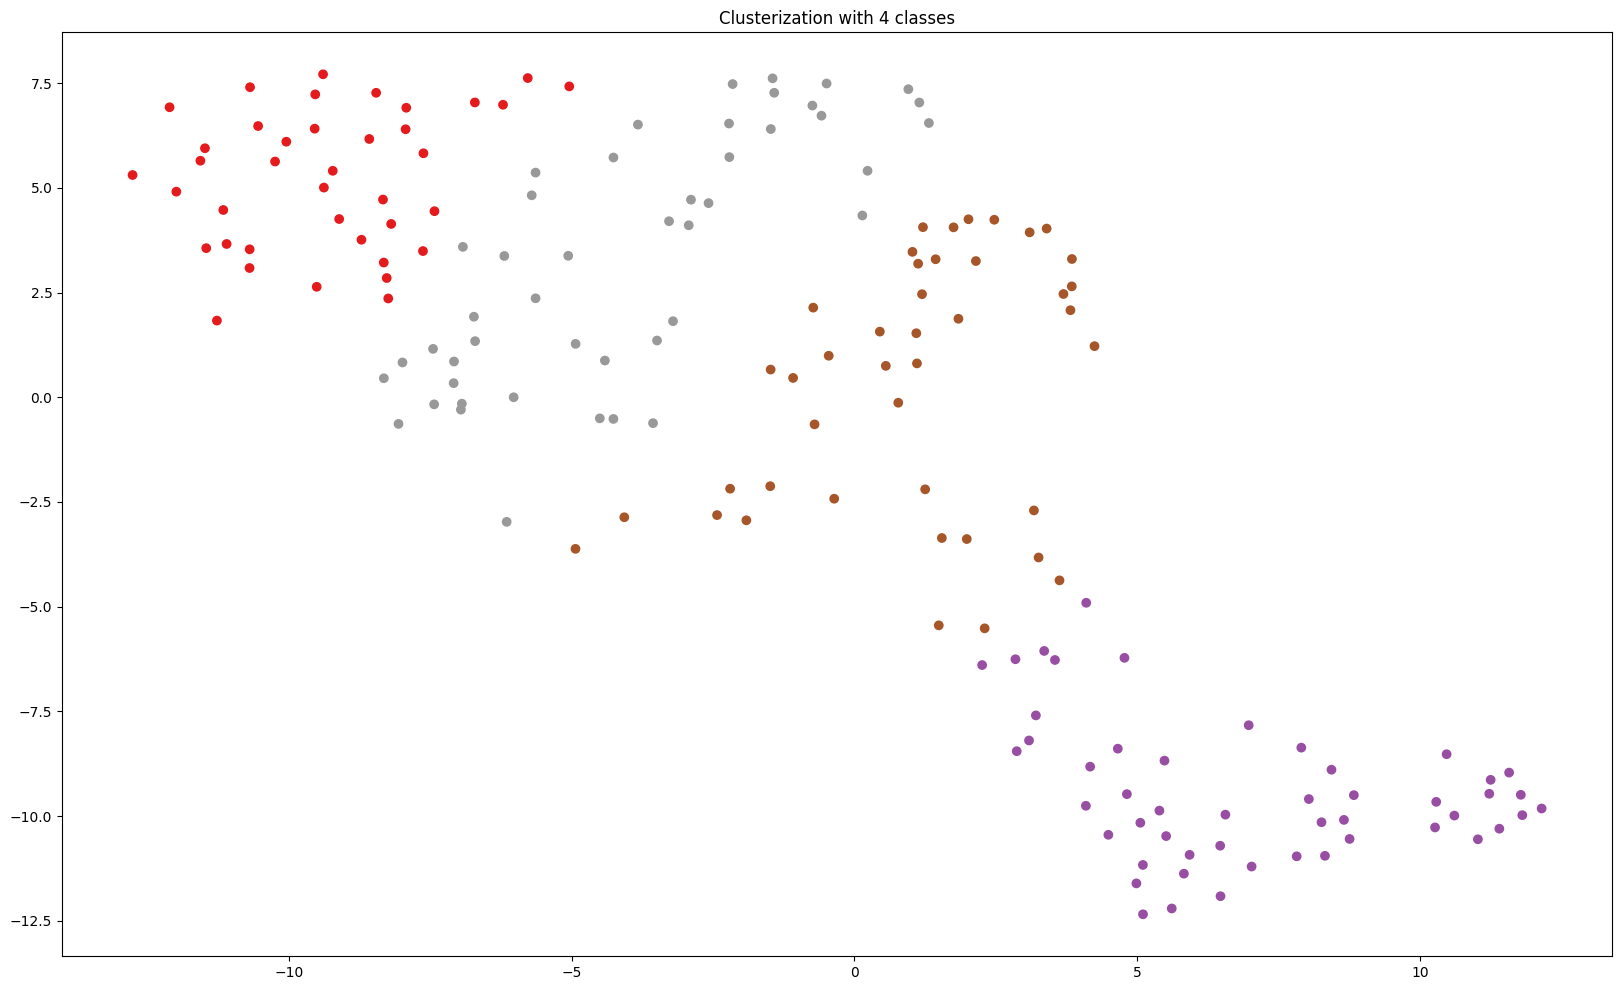

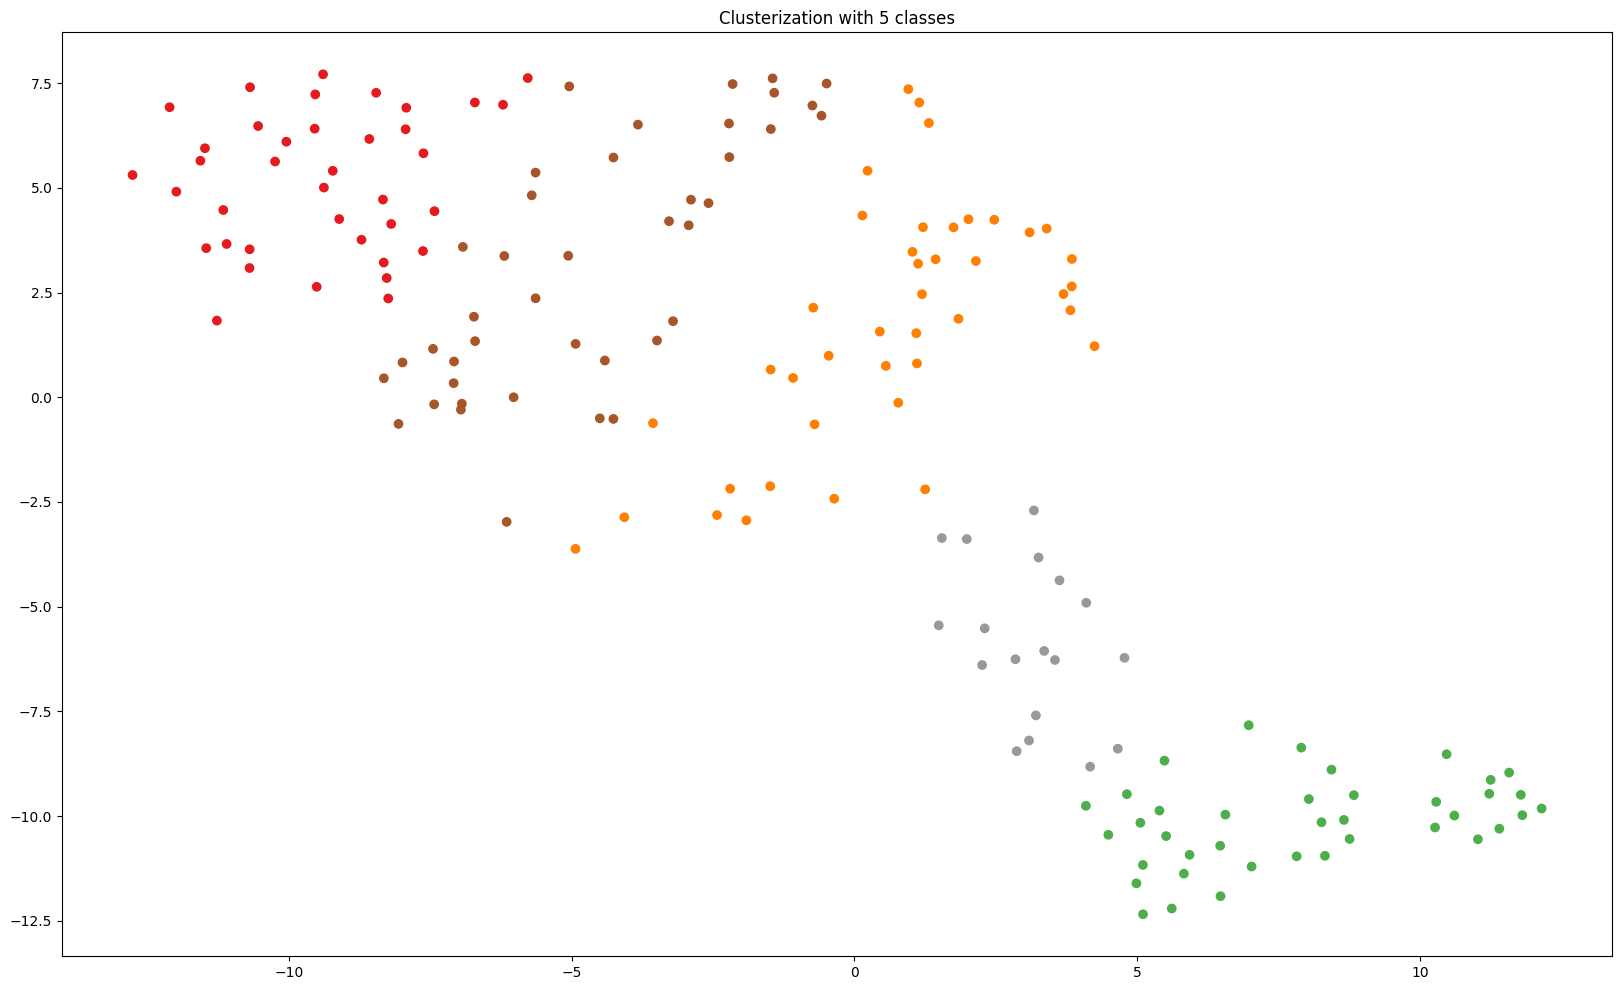

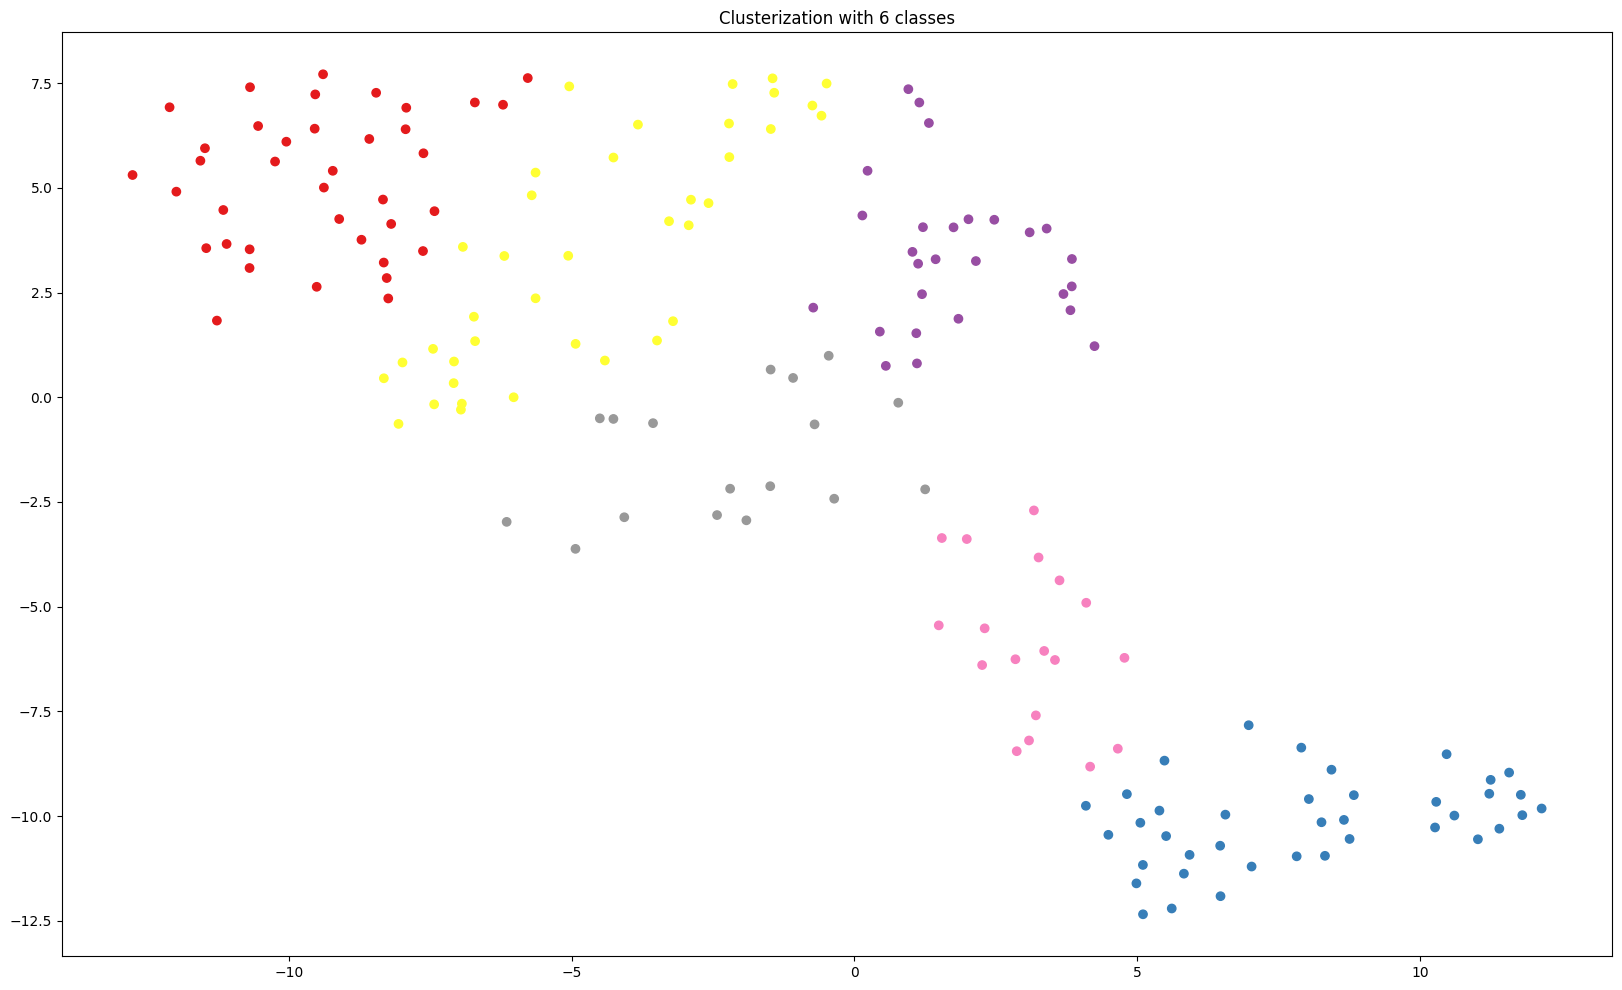

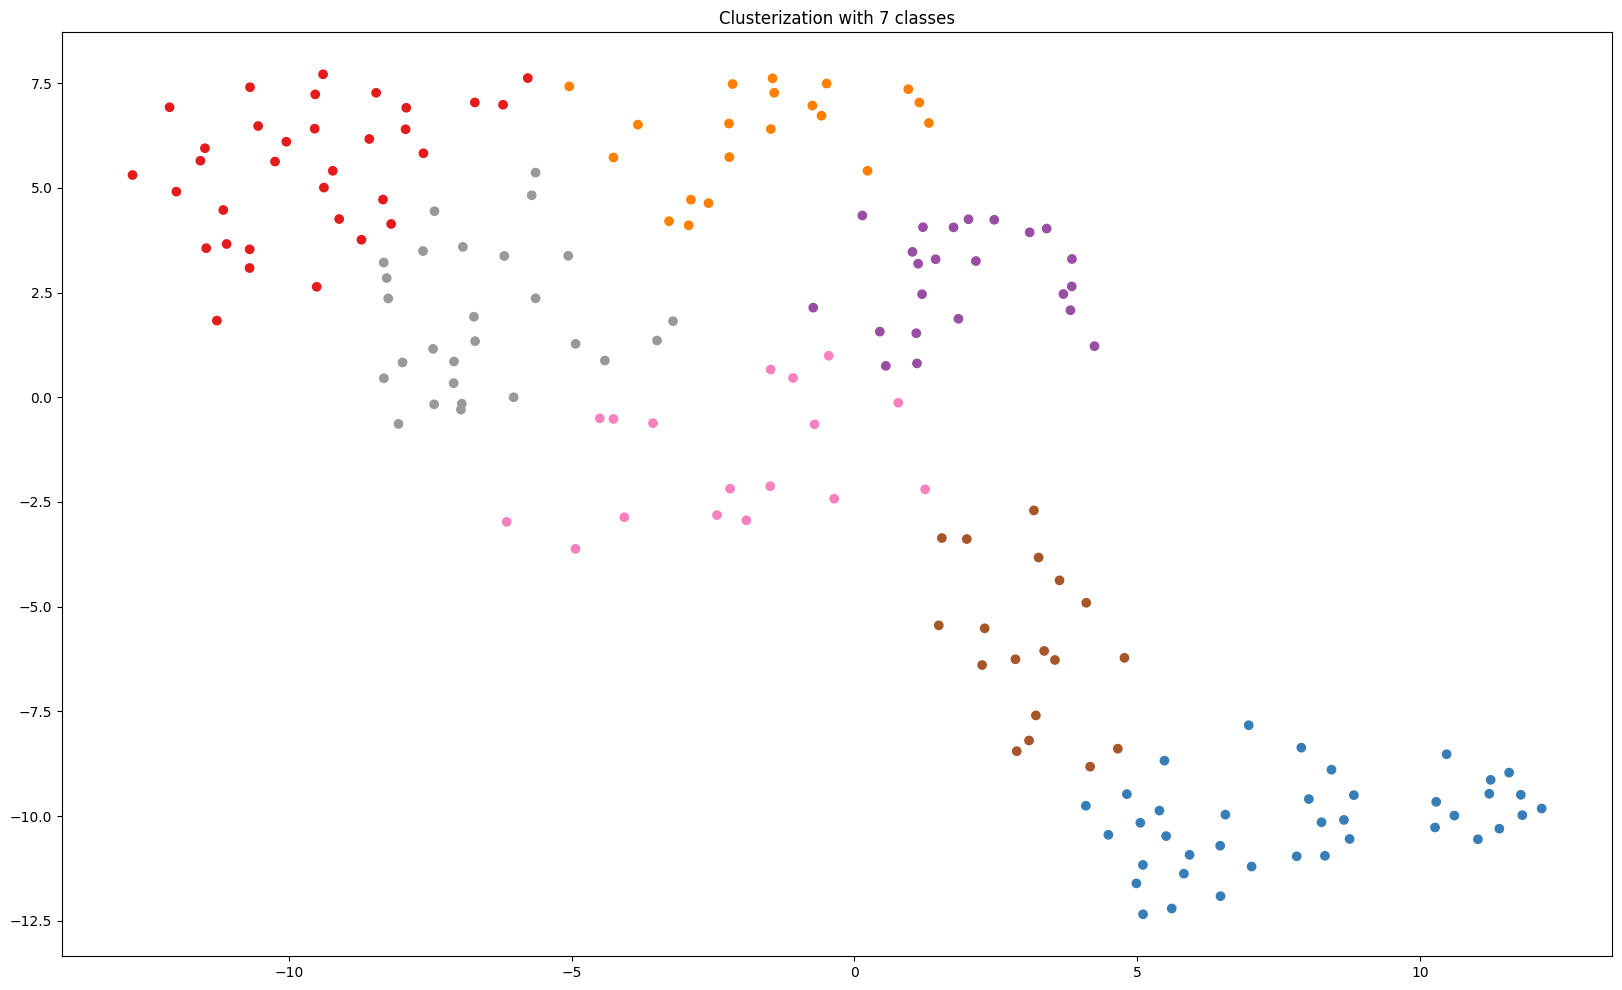

In [54]:
import geopandas as gpd

# Load the world dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
draw_map(df_normalized_per_death, 2005, 7, world, True)

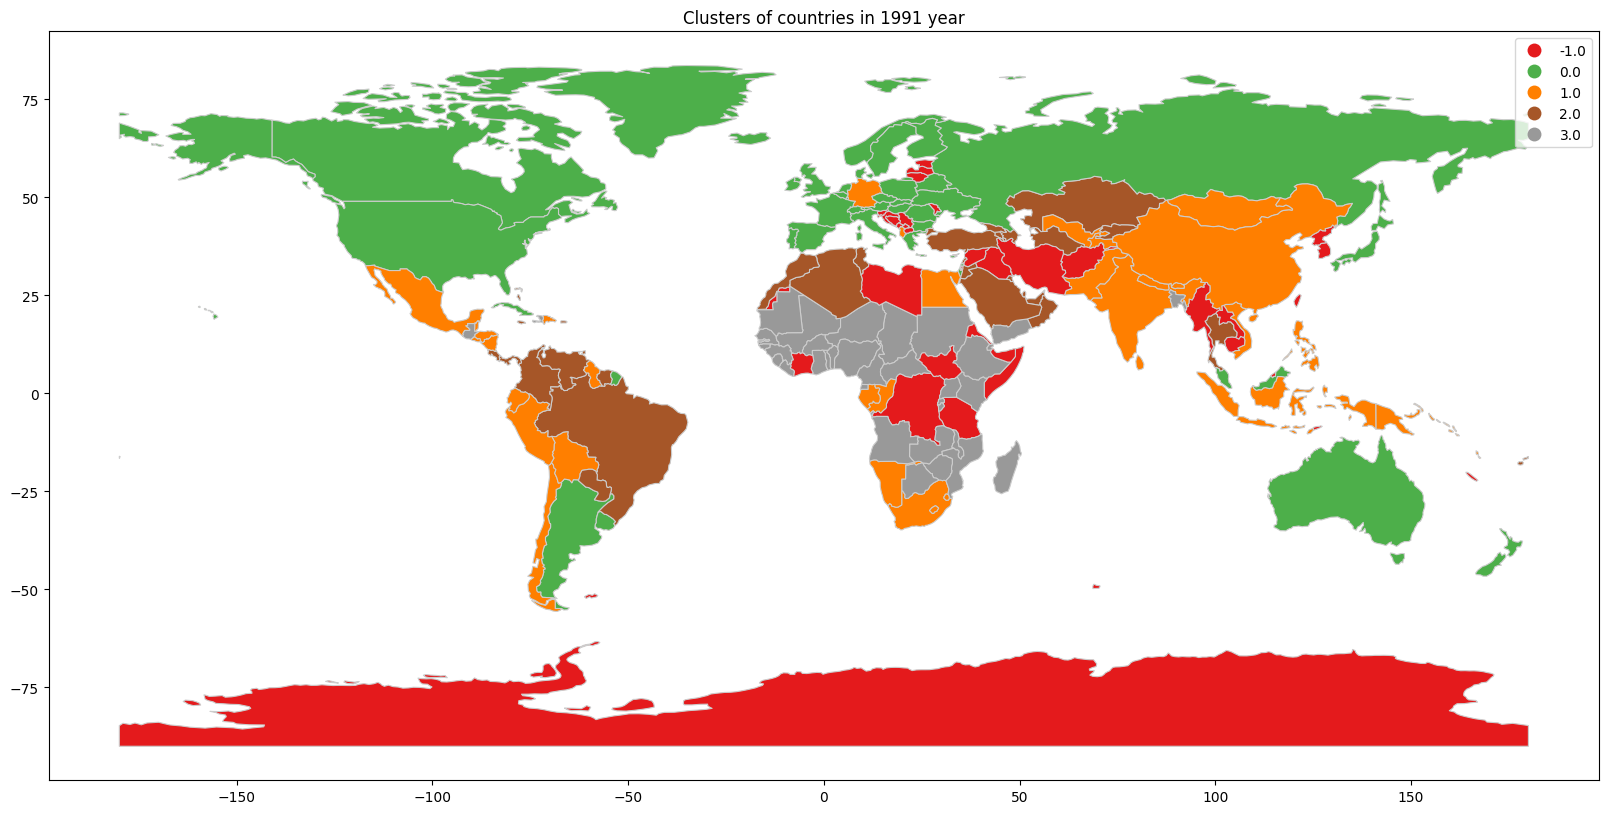

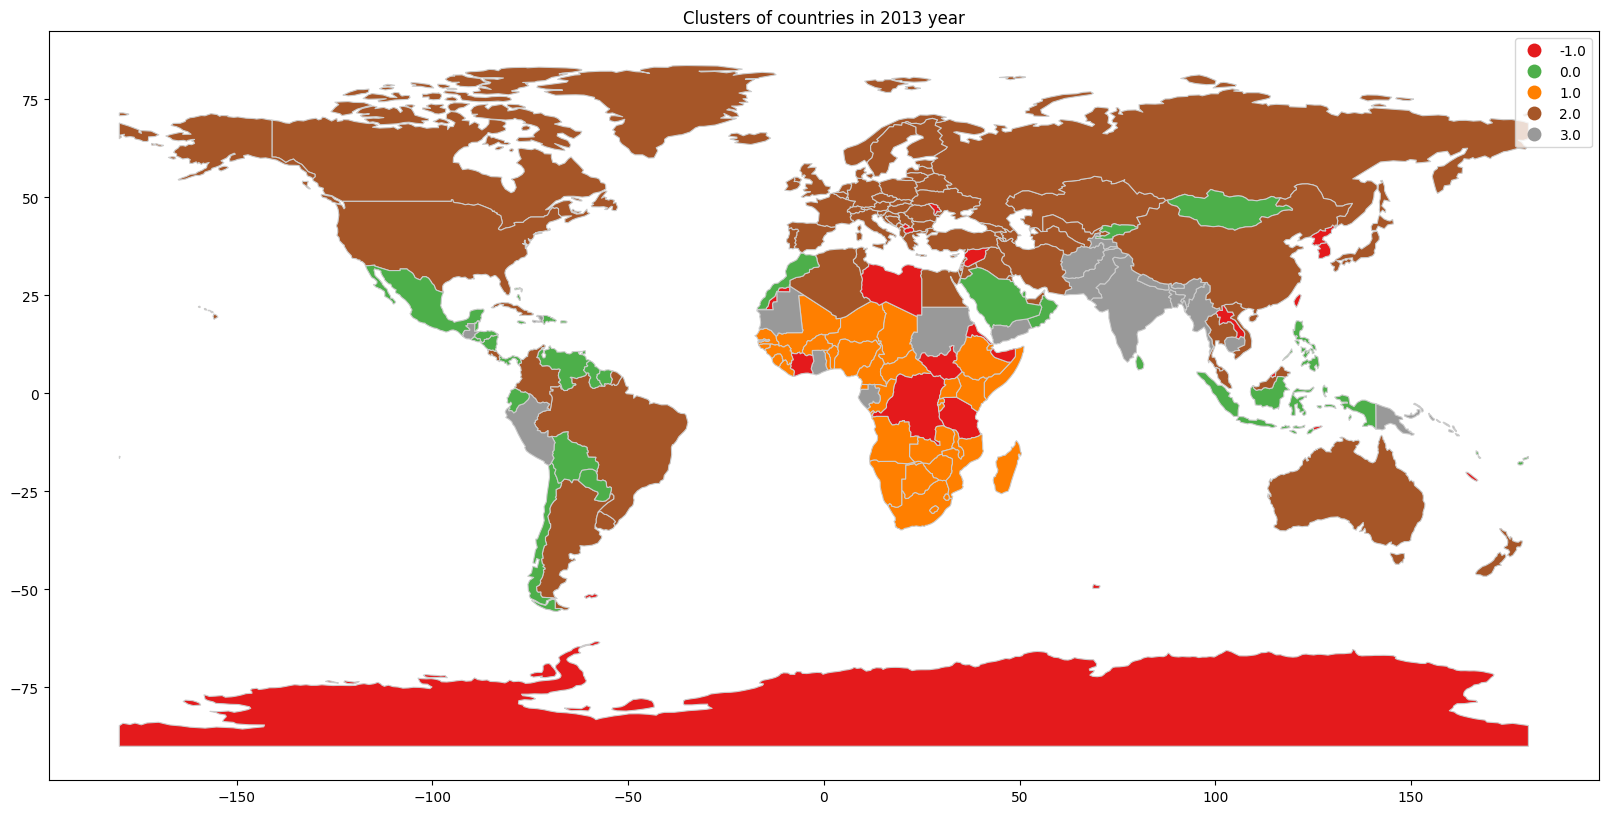

In [66]:
draw_map(df_normalized_per_death, 1991, 4, world)
draw_map(df_normalized_per_death, 2013, 4, world)

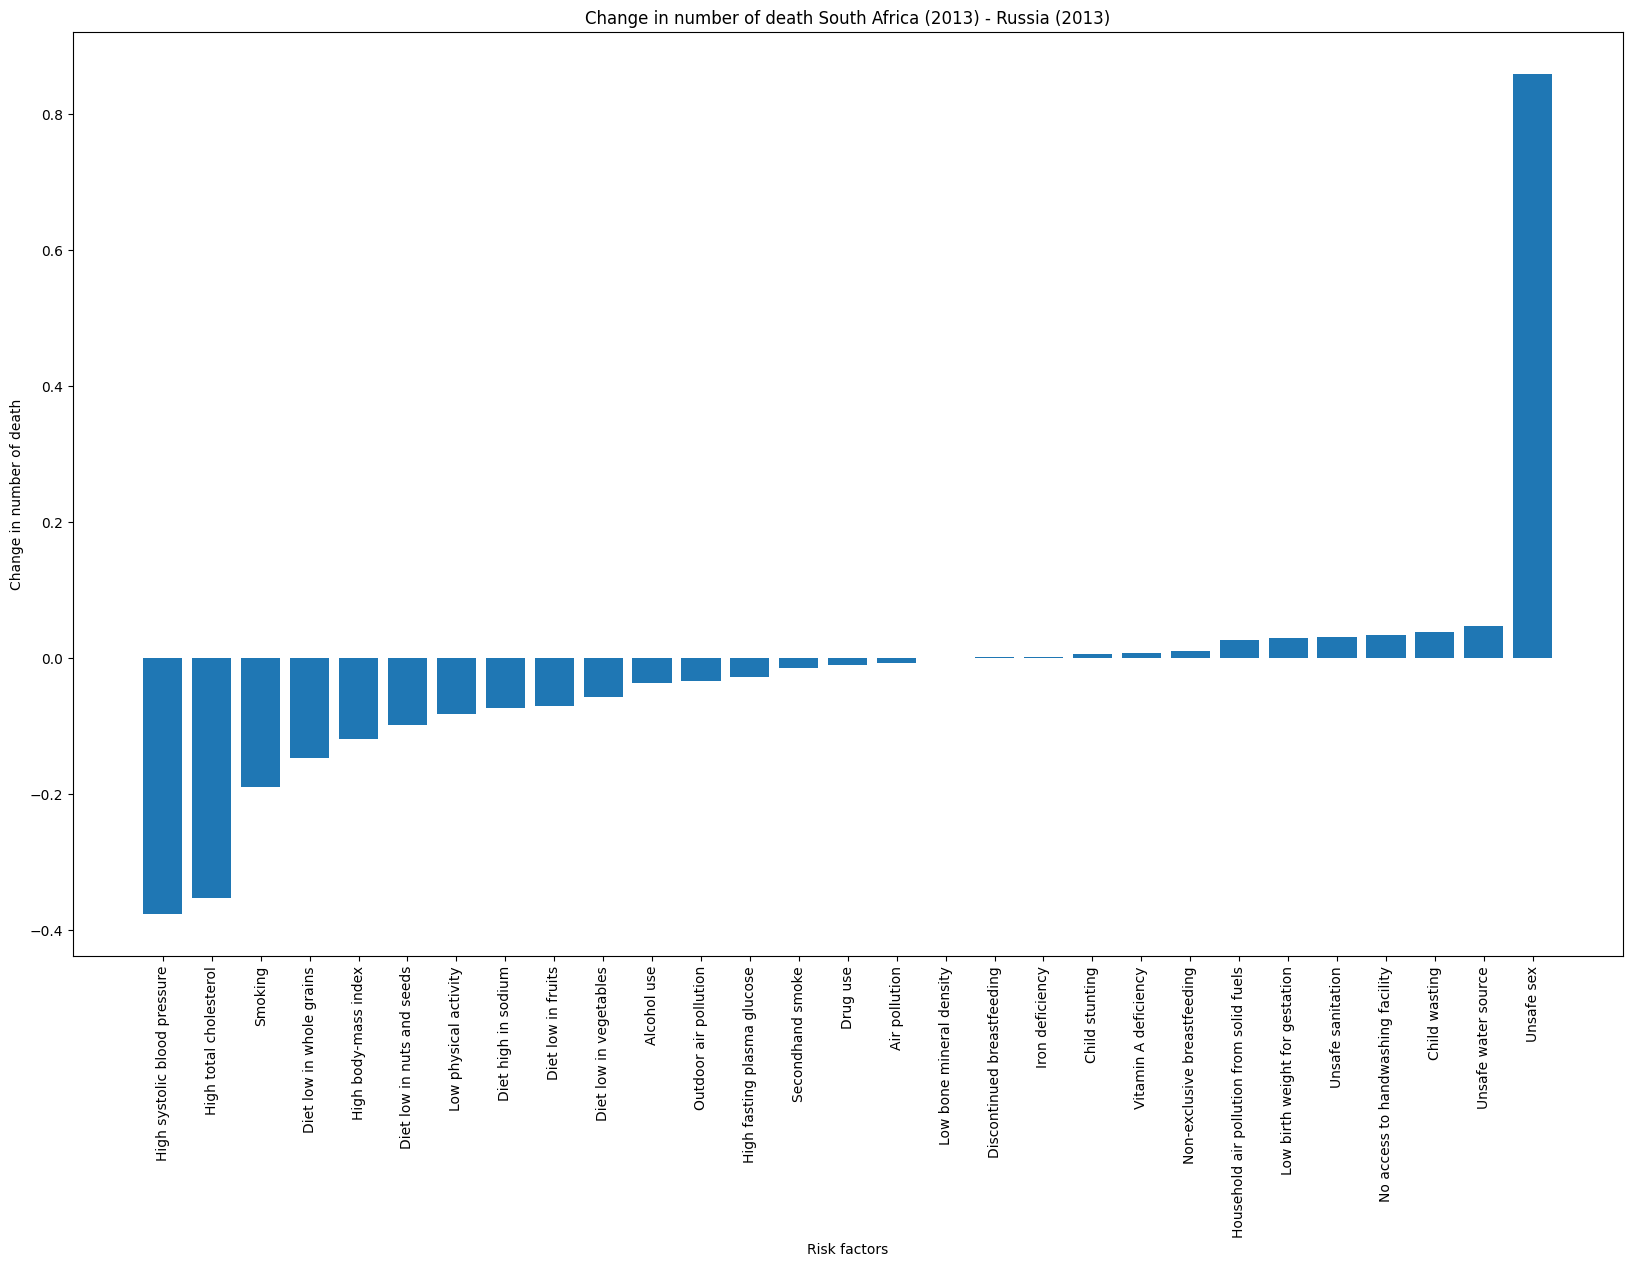

In [56]:
plot_difference(df_normalized_per_death, 'South Africa', 2013, 'Russia', 2013)

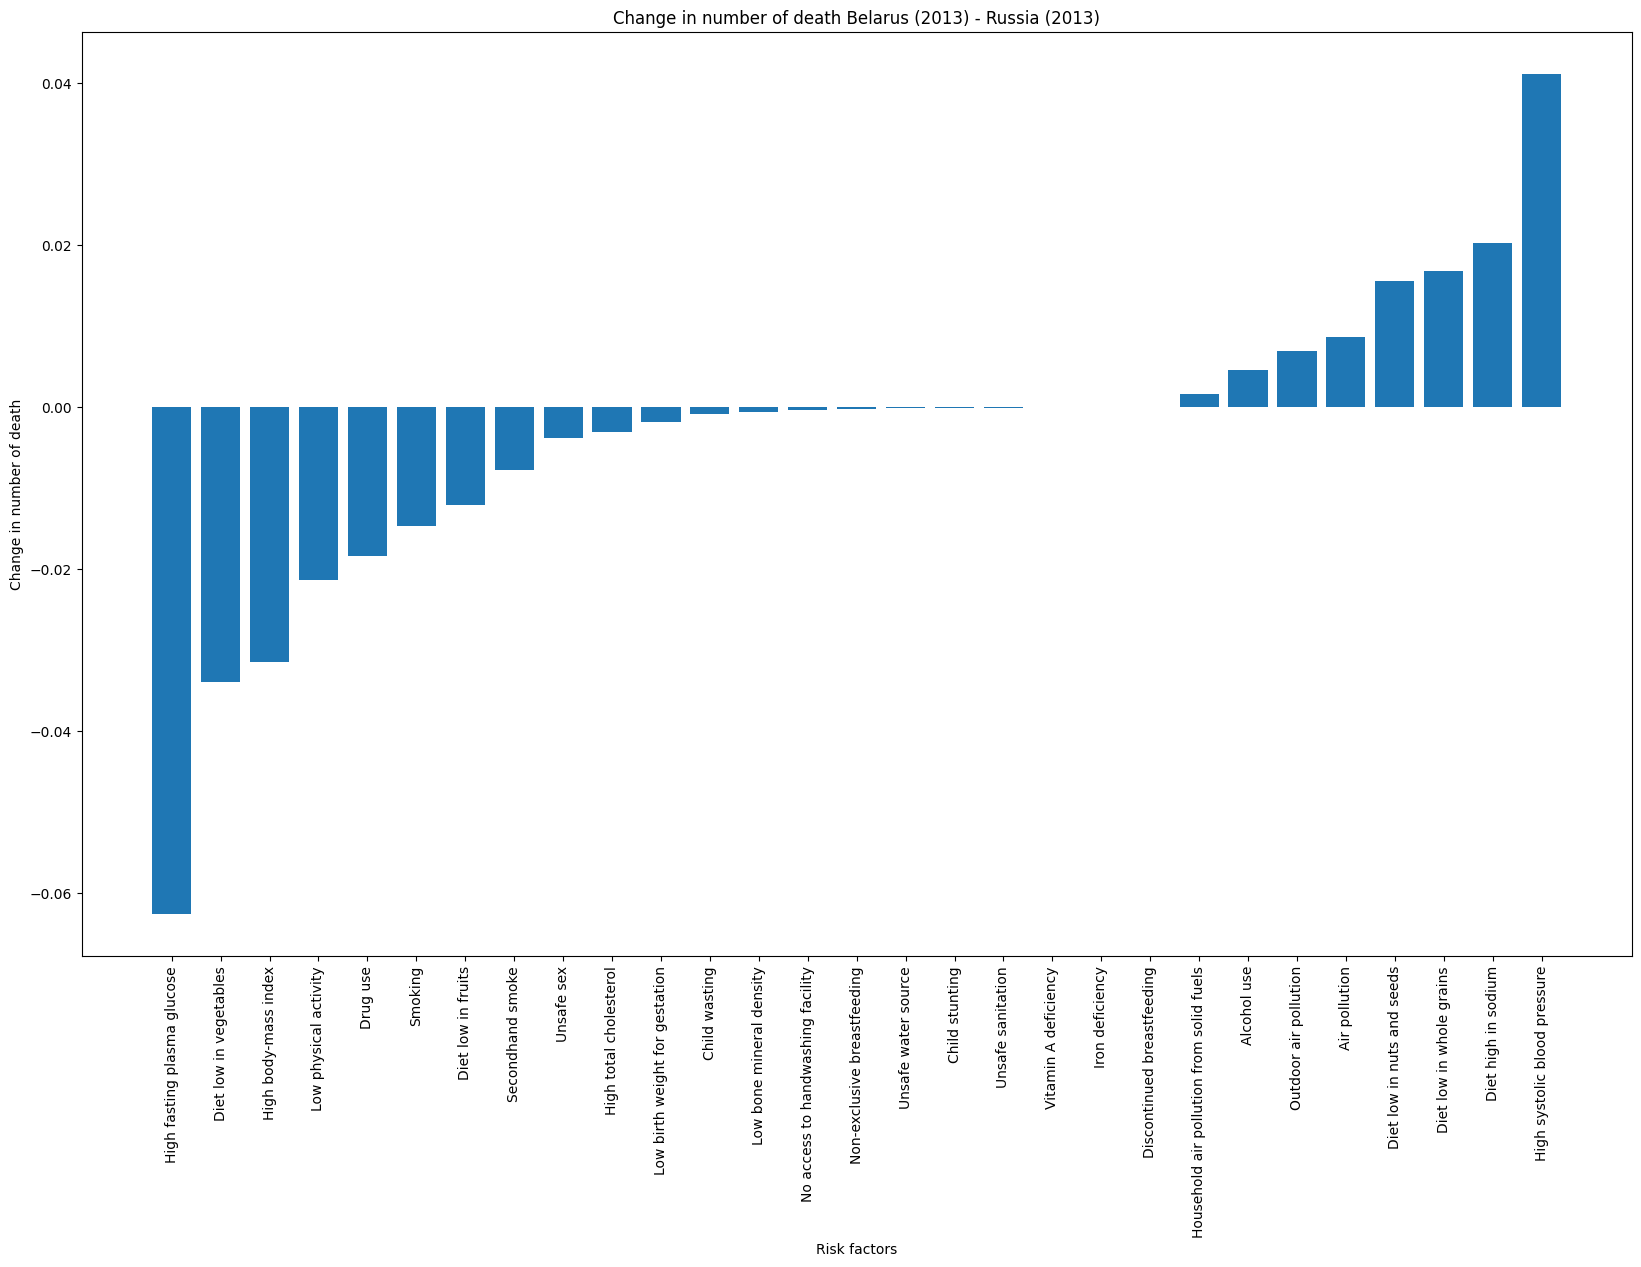

In [57]:
plot_difference(df_normalized_per_death, 'Belarus', 2013, 'Russia', 2013)

$H_0$: In Germany, the situation does not change from year to year (zero mean).

$H_1$: The situation changes from year to year (non-zero mean).


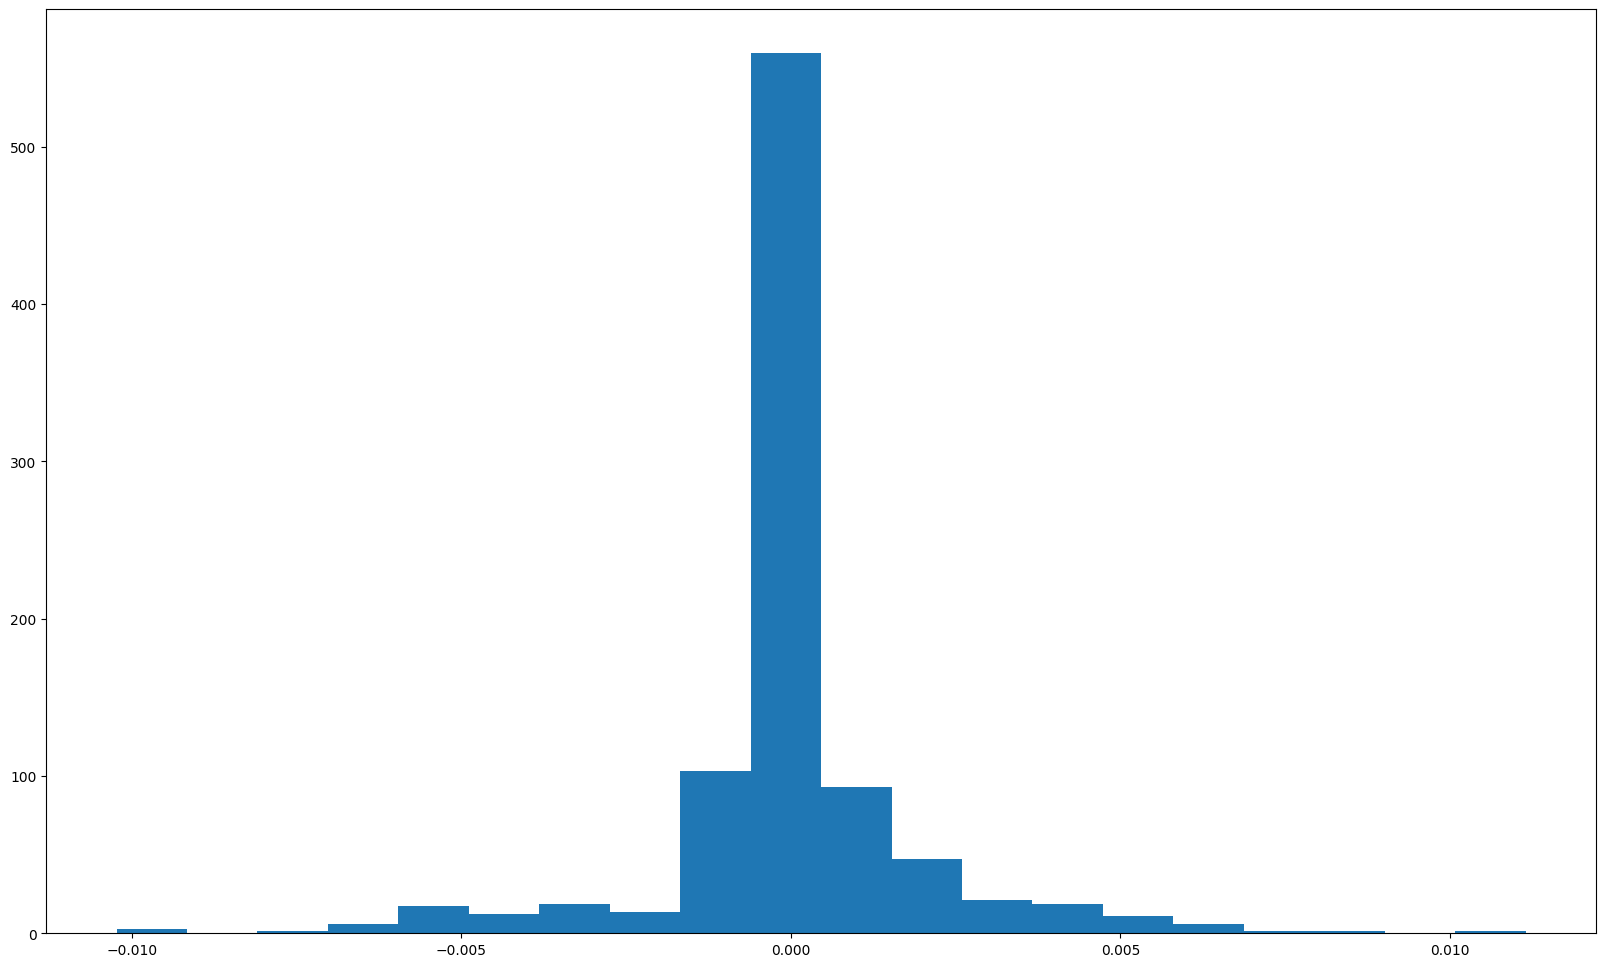

In [100]:
import numpy as np
from scipy import stats

# Goes with window on statistic of country and collects differences


def get_info_about_changes(data, country, window):
    res = []
    for year in range(1990, 2017 - window):
        res = np.concatenate((res, calculate_sorted_difference(
            data, country, year, country, year + window)[1]))
    return res


changes_germany_one_year_window = get_info_about_changes(
    df_normalized_per_death, 'Germany', 1)
plt.hist(changes_germany_one_year_window, bins=20, density=True)
plt.show()

In [101]:
stats.ttest_1samp(changes_germany_one_year_window, popmean=0)

TtestResult(statistic=0.32575519666022623, pvalue=0.7447000806326356, df=753)

$H_0$: In South Africa, the situation does not change from year to year (zero mean).

$H_1$: The situation changes from year to year (non-zero mean).

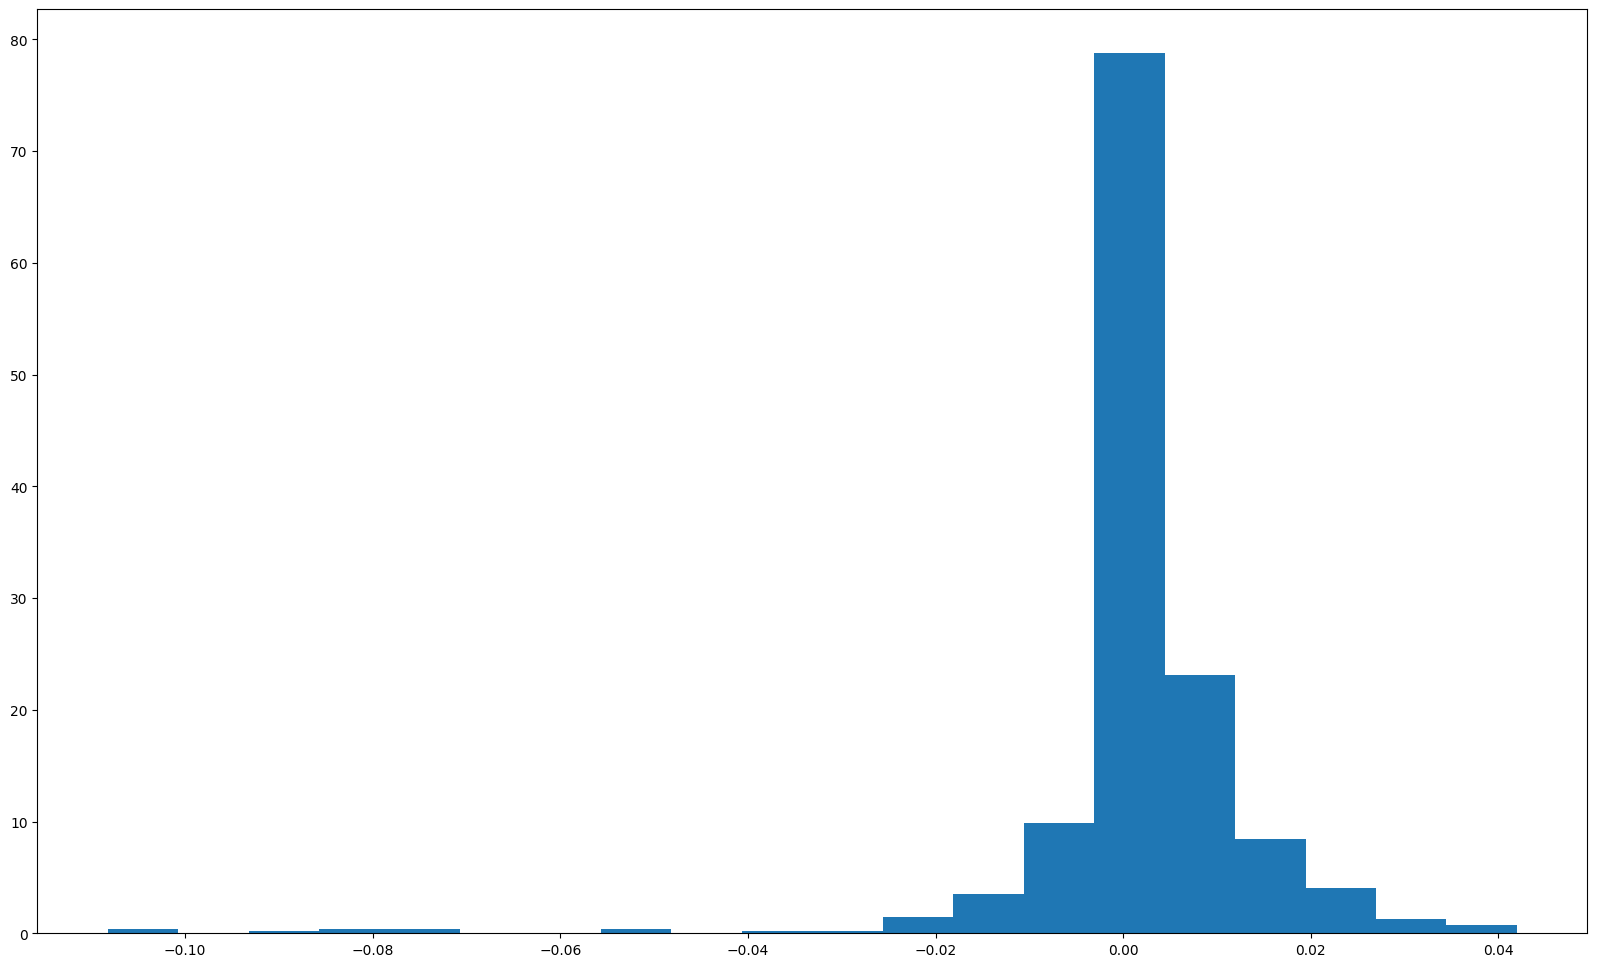

In [60]:
changes_sa_one_year_window = get_info_about_changes(
    df_normalized_per_death, 'South Africa', 1)
plt.hist(changes_sa_one_year_window, bins=20, density=True)
plt.show()

In [61]:
mean = np.mean(changes_sa_one_year_window)
std = np.std(changes_sa_one_year_window)

print(stats.ttest_1samp(changes_sa_one_year_window,
      popmean=0), f"Mean = {mean}, std = {std}")

TtestResult(statistic=3.7397809047430544, pvalue=0.00019815719218004984, df=753) Mean = 0.0016844321599777587, std = 0.012359612442723064


$H_0$: Distribution of disease in South Africa is normal.

$H_1$: Distribution of disease in South Africa is not normal.

In [62]:
mean = np.mean(changes_sa_one_year_window)
std = np.std(changes_sa_one_year_window)

# Correct usage of stats.kstest
result = stats.shapiro(changes_sa_one_year_window)

print(result)

ShapiroResult(statistic=0.6629697162640873, pvalue=4.348453316864061e-36)


In [63]:
table_2013 = df_not_normalized[df_not_normalized['Year'] == 2013].reset_index()
table_2013 = table_2013.drop(
    ['index', 'Entity', 'Year', 'Country Code'], axis=1)

norms = np.linalg.norm(table_2013.iloc[:, 0:29], axis=1)
data_for_year_normalized = table_2013.iloc[:, 0:29].div(norms, axis=0)

classes = pd.get_dummies(pd.DataFrame(
    clusterize(df_normalized_per_person, 2013, 4))[1])
table_2013 = pd.concat([data_for_year_normalized, table_2013.loc[:, [
                       'gdp', 'ppp', 'Population']], classes], axis=1)

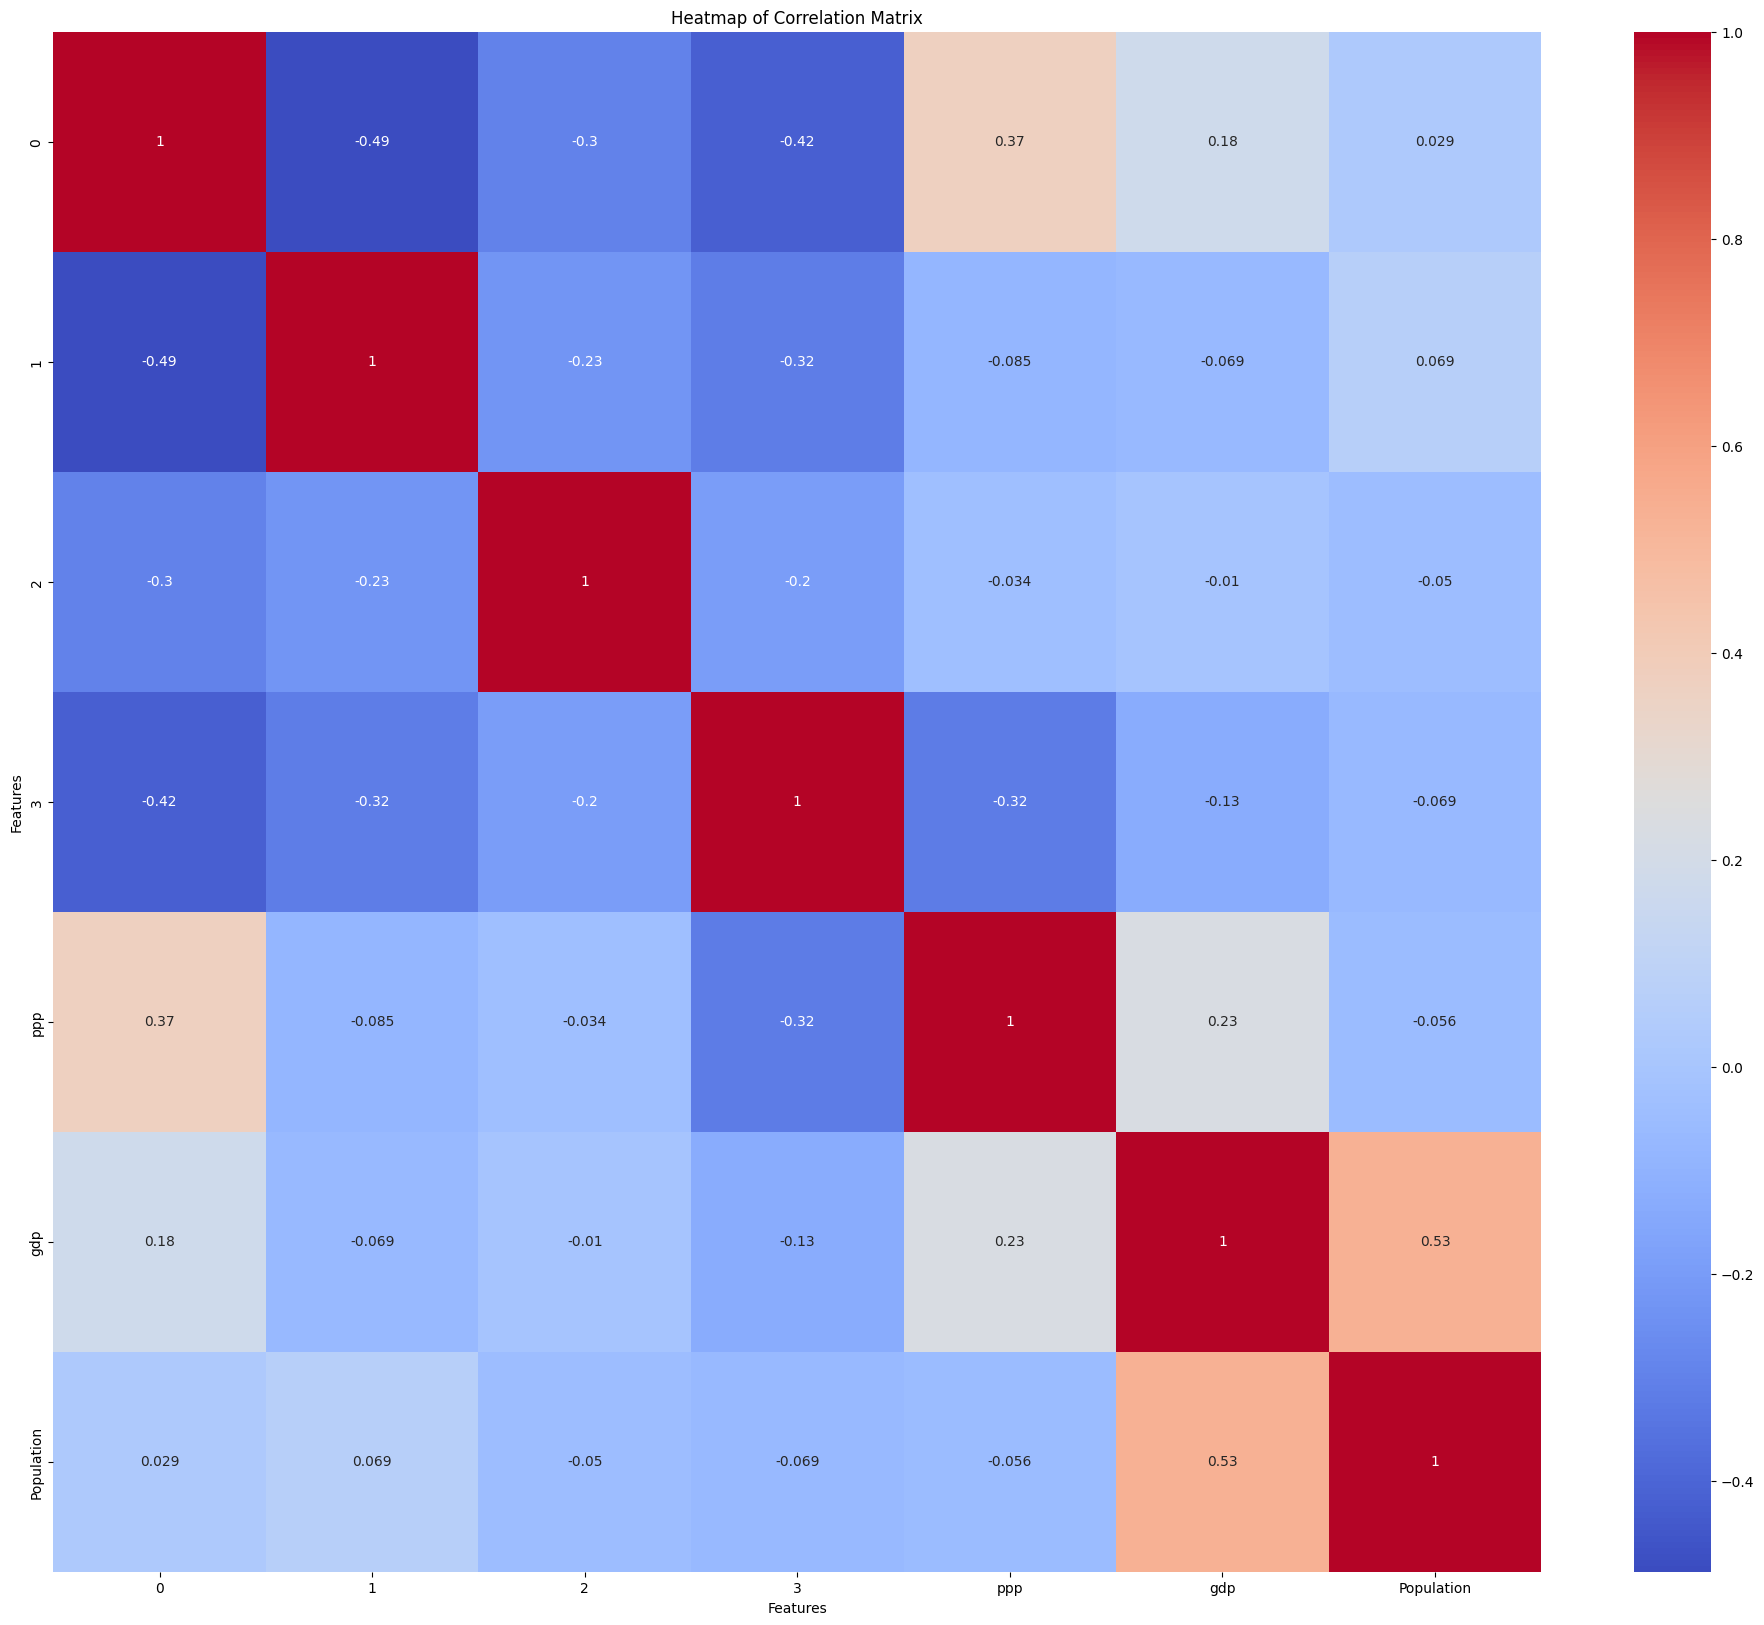

In [64]:
import seaborn as sns

# Вычисляем корреляционную матрицу
correlation_matrix = table_2013.corr()

# Создаем heatmap
plt.figure(figsize=(24, 20))
labels = [0, 1, 2, 3, 'ppp', 'gdp', 'Population']
sns.heatmap(correlation_matrix.loc[labels,
            labels], annot=True, cmap='coolwarm')

# Добавляем заголовки
plt.title('Heatmap of Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Показываем график
plt.show()

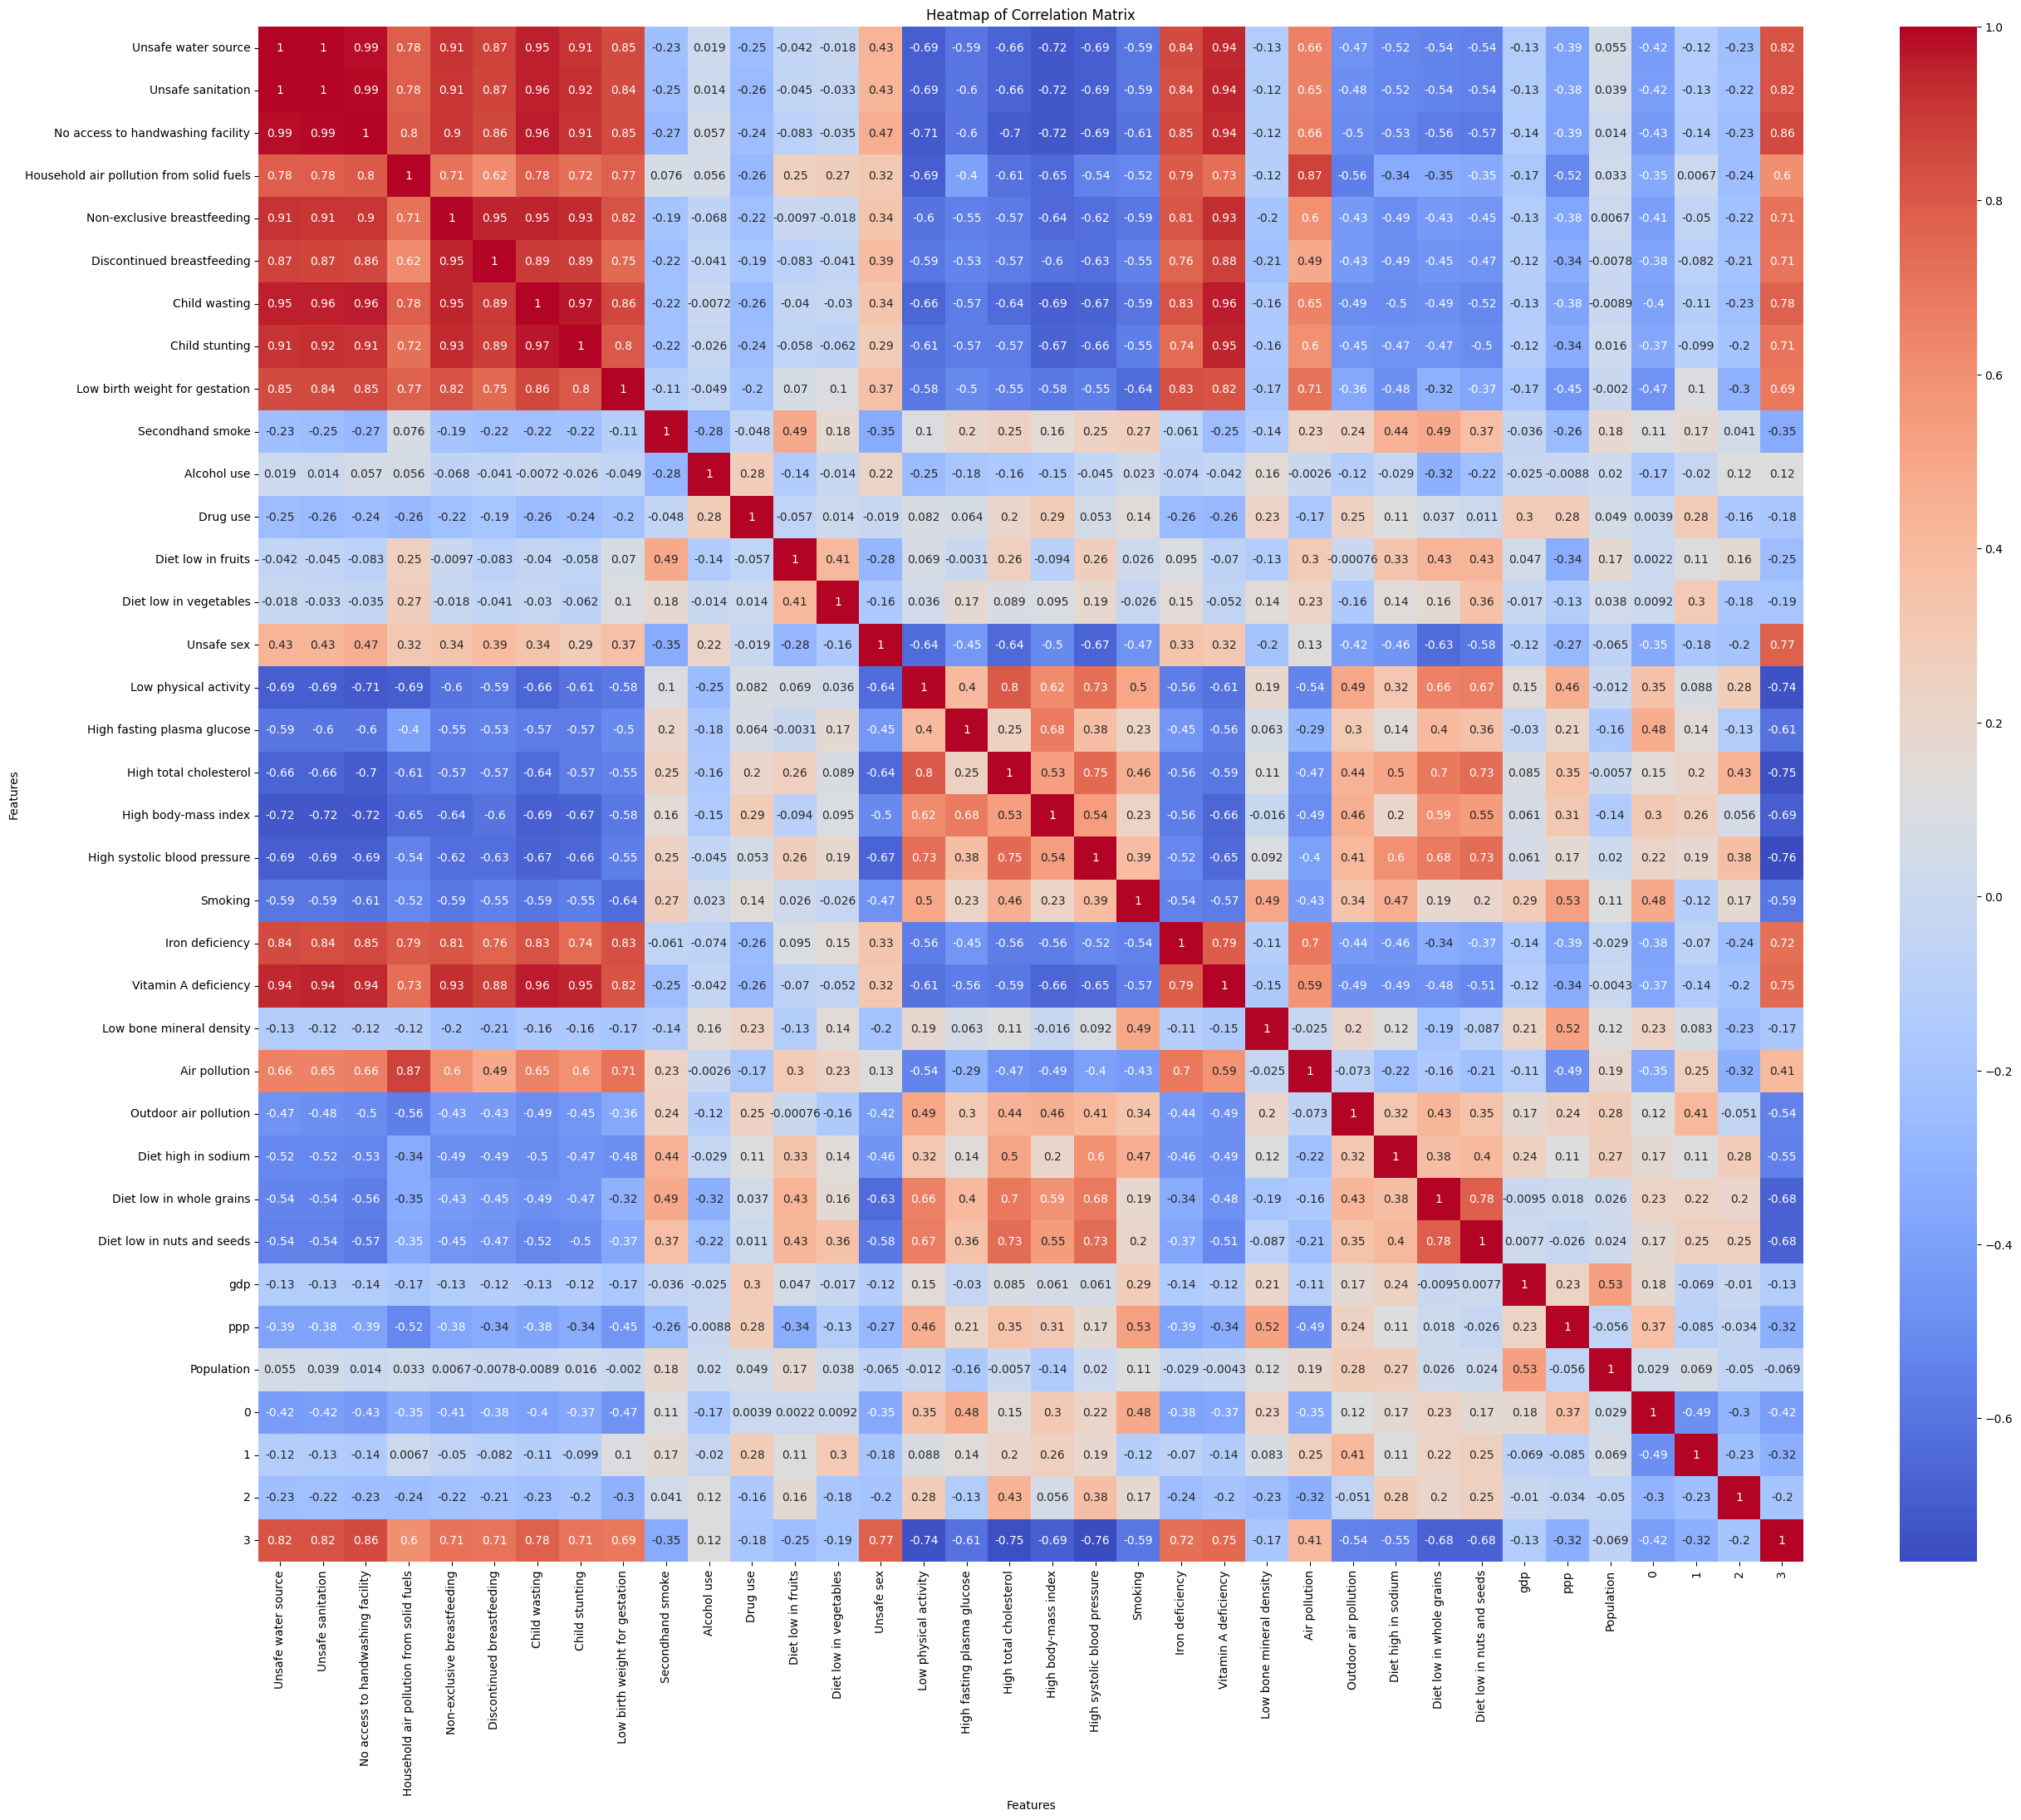

In [65]:
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Heatmap of Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()